In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_5min.csv')
df = pd.read_csv('AUD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222691, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222690, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137,0.70111,17,2,1,0.00003,0.701320,0.00010,0.701337
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139,0.70112,17,2,1,0.00016,0.701125,0.00053,0.701157
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132,0.70088,17,2,1,0.00001,0.701125,0.00039,0.701125
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126,0.70114,17,2,1,0.00024,0.701050,0.00042,0.701025
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159,0.70095,17,2,1,-0.00026,0.701185,0.00081,0.701098


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137,0.70111,17,2,1,0.00003,0.701320,0.00010,0.701337,-25.514858
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139,0.70112,17,2,1,0.00016,0.701125,0.00053,0.701157,-25.514750
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132,0.70088,17,2,1,0.00001,0.701125,0.00039,0.701125,-25.514746
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126,0.70114,17,2,1,0.00024,0.701050,0.00042,0.701025,-25.514696
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159,0.70095,17,2,1,-0.00026,0.701185,0.00081,0.701098,-25.514750


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70127  0.70137         0.70111    17    2   
2020-01-01 17:05:00  0.70127  0.70086  0.70139         0.70112    17    2   
2020-01-01 17:10:00  0.70113  0.70093  0.70132         0.70088    17    2   
2020-01-01 17:15:00  0.70112  0.70084  0.70126         0.70114    17    2   
2020-01-01 17:20:00  0.70088  0.70078  0.70159         0.70095    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00003   0.701320  0.00010    0.701337 -25.514858  
2020-01-01 17:05:00     1   0.00016   0.701125  0.00053    0.701157 -25.514750  
2020-01-01 17:10:00     1   0.00001   0.701125  0.00039    0.701125 -25.514746  
2020-01-01 17:15:00     1   0.00024   0.701050  0.00042

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178152
178152
22000
22000
22538
22538


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178152, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178127, 24, 12)
(21975, 24, 12)
(22513, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178127, 1)
(21975, 1)
(22513, 1)


array([[0.60305166],
       [0.6032524 ],
       [0.60252976],
       ...,
       [0.632082  ],
       [0.63103795],
       [0.63147974]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.60305166, 0.6032524 , 0.60252976, ..., 0.632082  , 0.63103795,
       0.63147974], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD5_GRU.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 606.2689 - mae: 9.7499 - mse: 606.2689 - root_mean_squared_error: 24.6225 - mape: 16310.7871
Epoch 1: val_mse improved from inf to 4.03455, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_GRU.hdf5
463/463 [==============================] - 234s 490ms/step - loss: 606.2689 - mae: 9.7499 - mse: 606.2689 - root_mean_squared_error: 24.6225 - mape: 16310.7871 - val_loss: 4.0345 - val_mae: 1.9974 - val_mse: 4.0345 - val_root_mean_squared_error: 2.0086 - val_mape: 112404.1641
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 1.5640 - mae: 1.2031 - mse: 1.5640 - root_mean_squared_error: 1.2506 - mape: 10074.8896
Epoch 2: val_mse improved from 4.03455 to 0.98892, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_GRU.hdf5
463/463 [==============================] - 226s 488ms/step - loss: 1.5640 - mae: 1.2031 - mse: 1.5640 - root_mean_squared_error: 1.2506 - mape: 10074.8896 - val_los

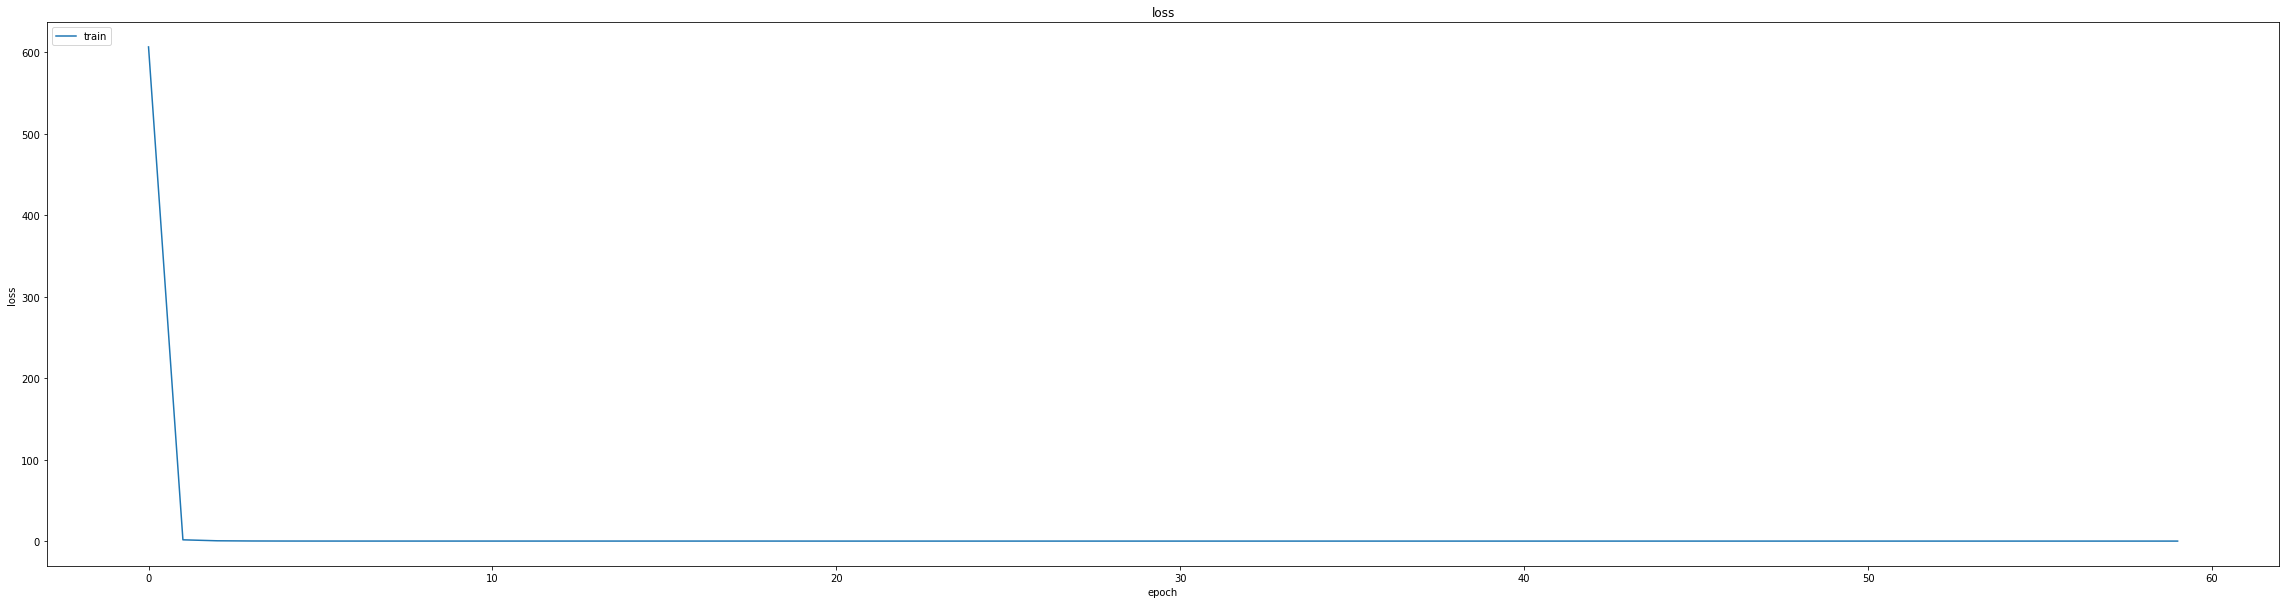

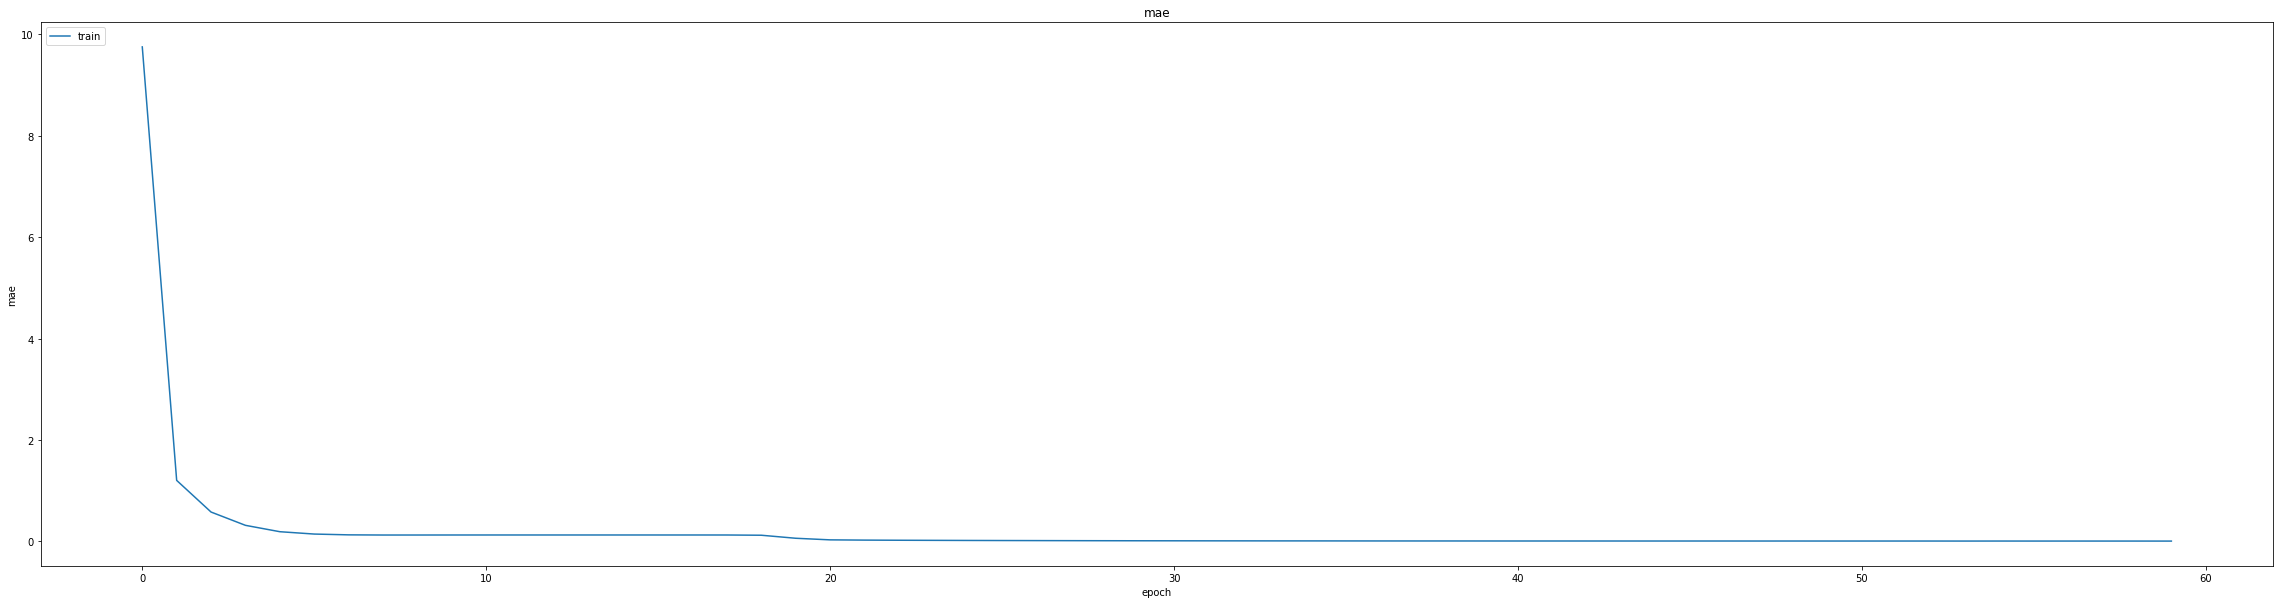

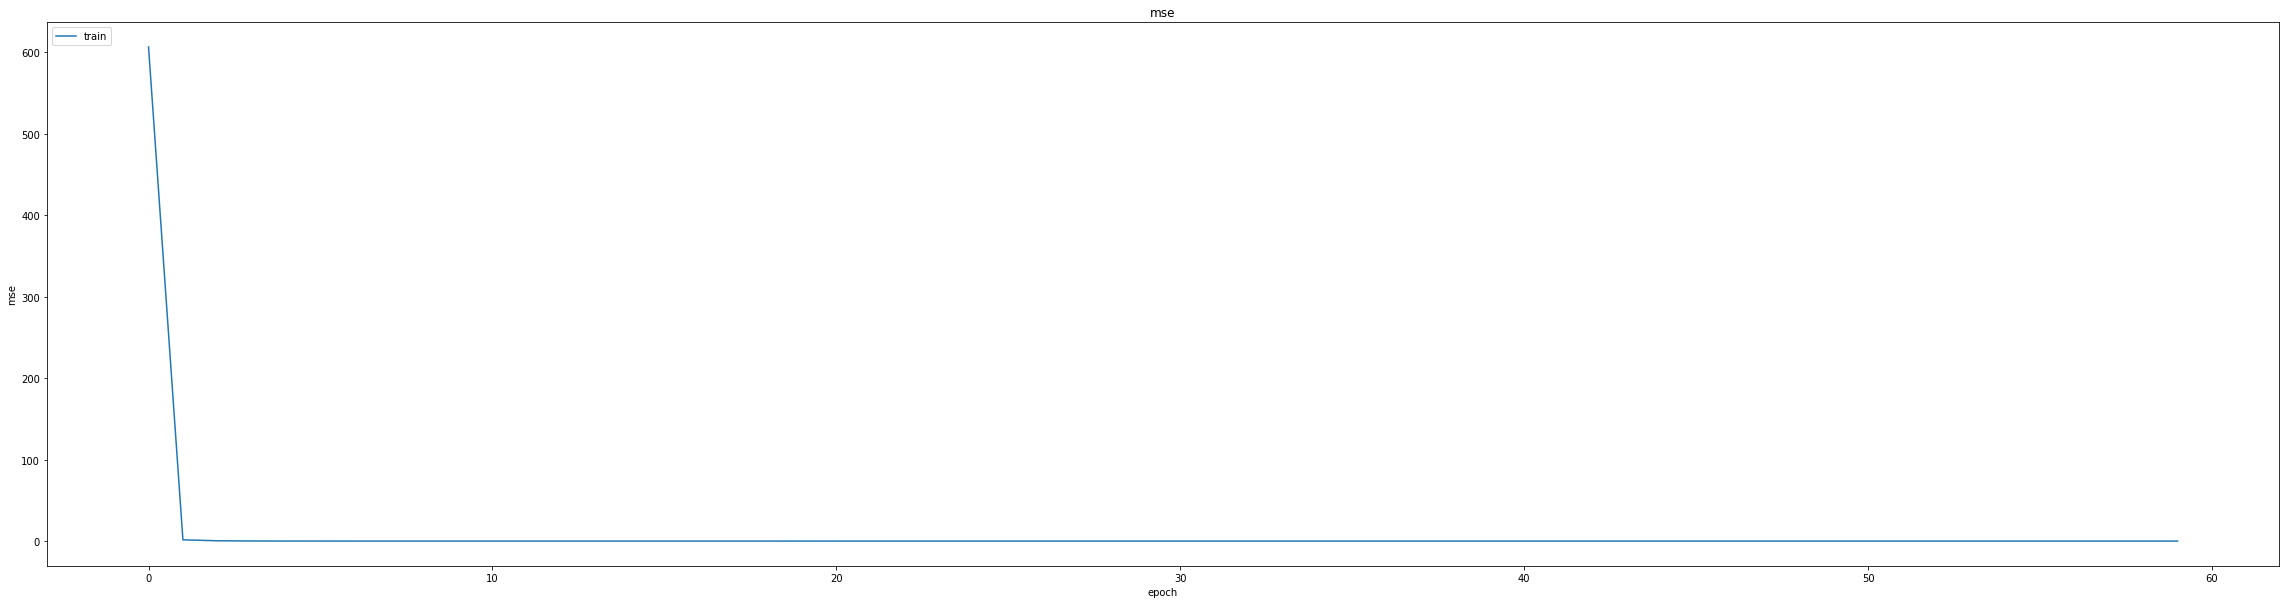

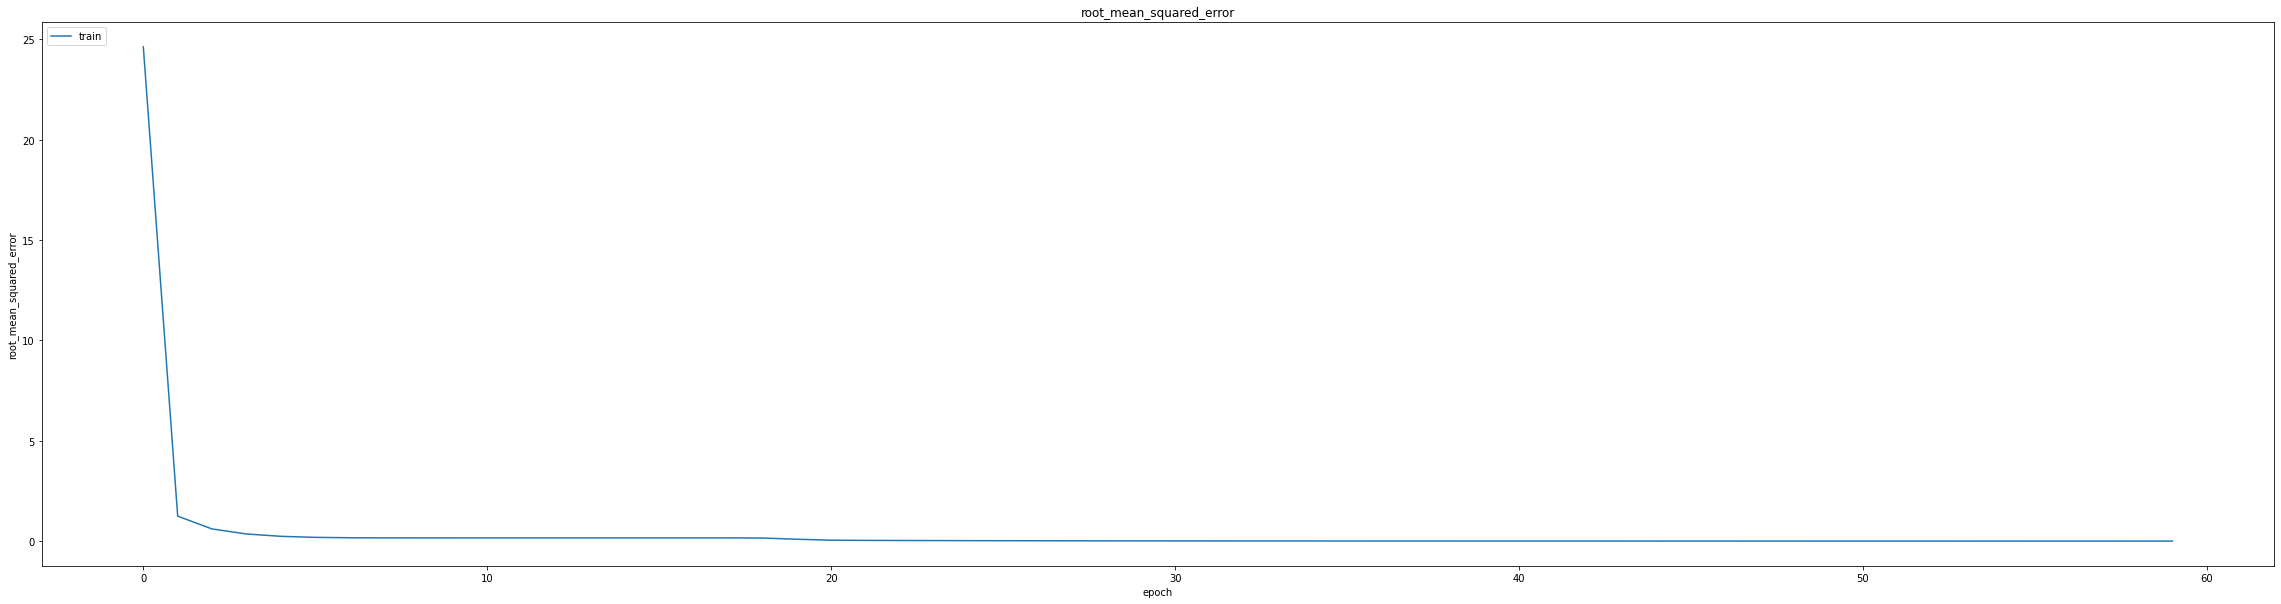

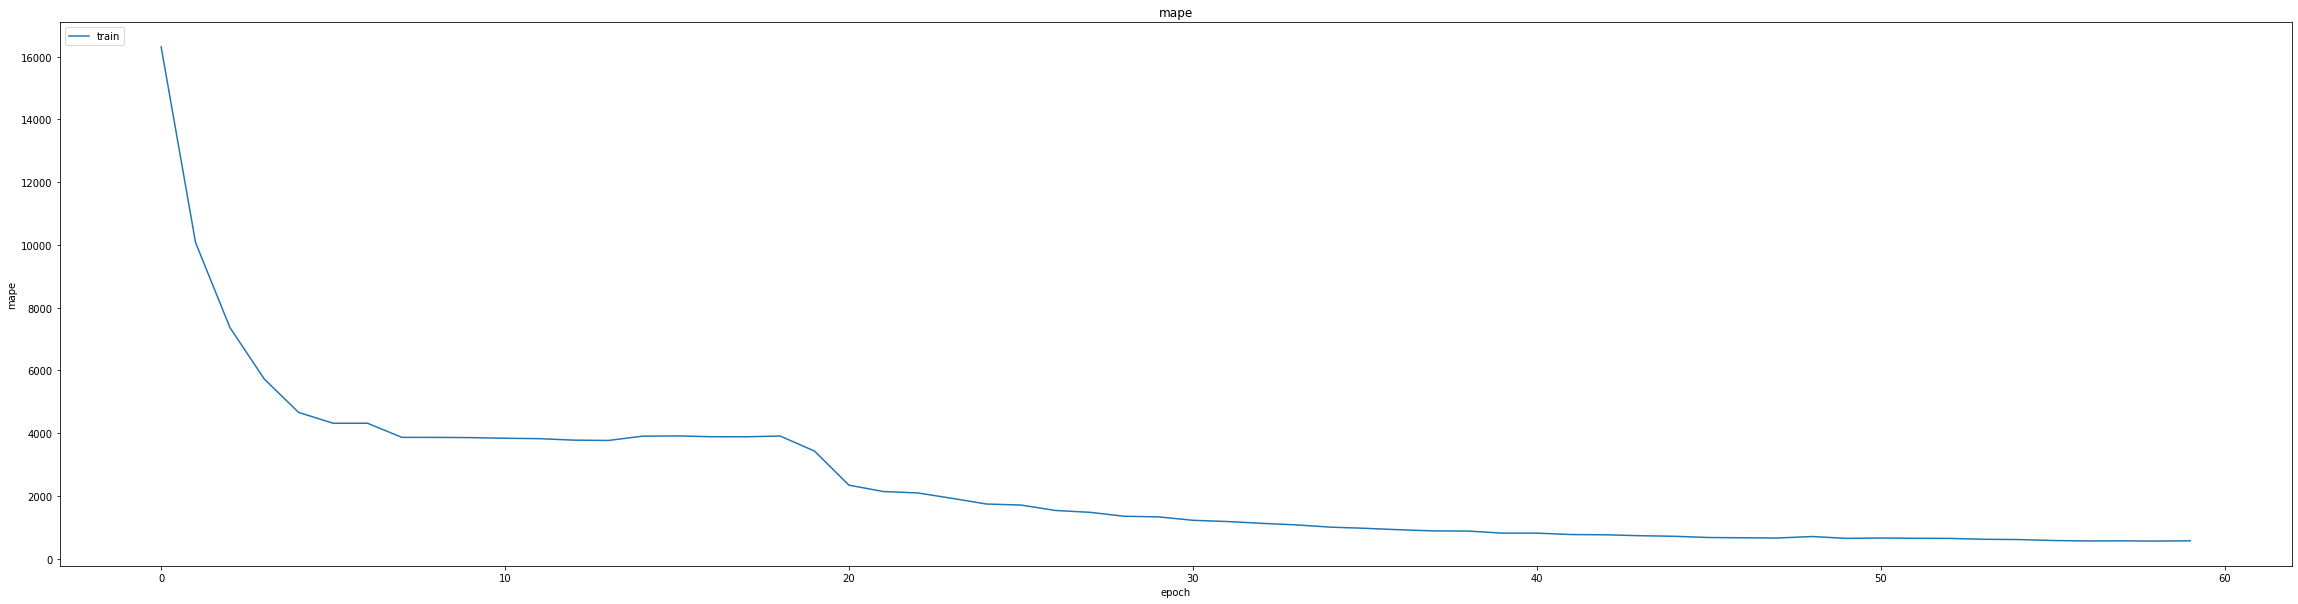

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.019086241722106934
0.025796720758080482
687/687 [==============================] - 31s 43ms/step
0.9850505406450243


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD5_GRU.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
1392/1392 [==============================] - ETA: 0s - loss: 1.5555e-04 - mae: 0.0071 - mse: 1.5555e-04 - root_mean_squared_error: 0.0125 - mape: 556.4913
Epoch 1: val_mse did not improve from 0.00067
1392/1392 [==============================] - 296s 207ms/step - loss: 1.5555e-04 - mae: 0.0071 - mse: 1.5555e-04 - root_mean_squared_error: 0.0125 - mape: 556.4913 - val_loss: 7.7738e-04 - val_mae: 0.0216 - val_mse: 7.7738e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 4409.5078 - lr: 0.0010
Epoch 2/20
1392/1392 [==============================] - ETA: 0s - loss: 8.2337e-05 - mae: 0.0071 - mse: 8.2337e-05 - root_mean_squared_error: 0.0091 - mape: 484.2038
Epoch 2: val_mse did not improve from 0.00067
1392/1392 [==============================] - 285s 205ms/step - loss: 8.2337e-05 - mae: 0.0071 - mse: 8.2337e-05 - root_mean_squared_error: 0.0091 - mape: 484.2038 - val_loss: 7.2905e-04 - val_mae: 0.0200 - val_mse: 7.2905e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 4

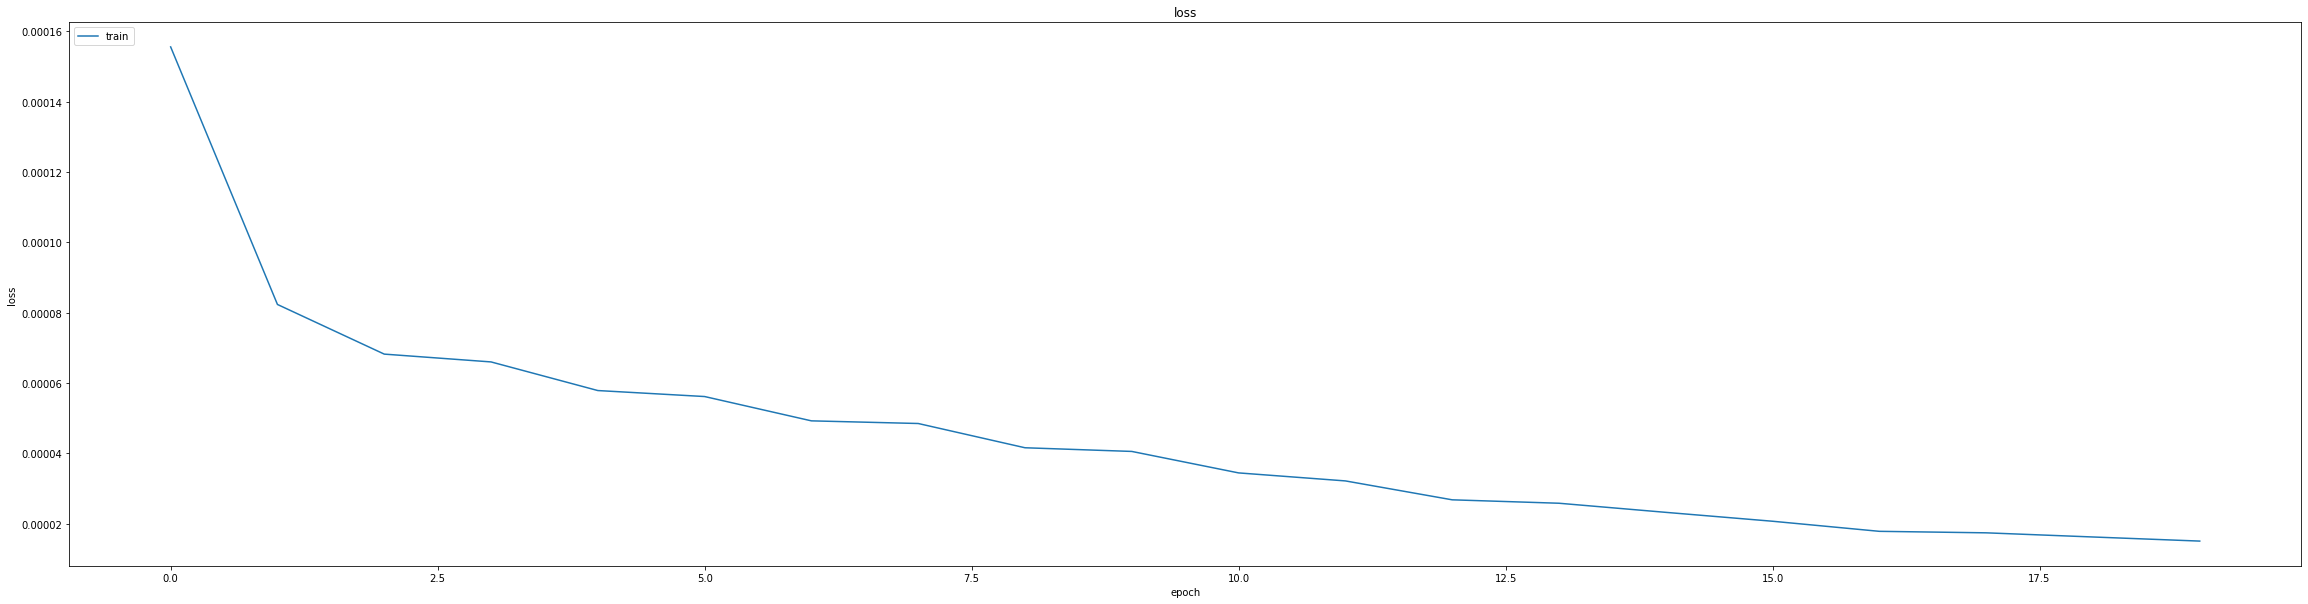

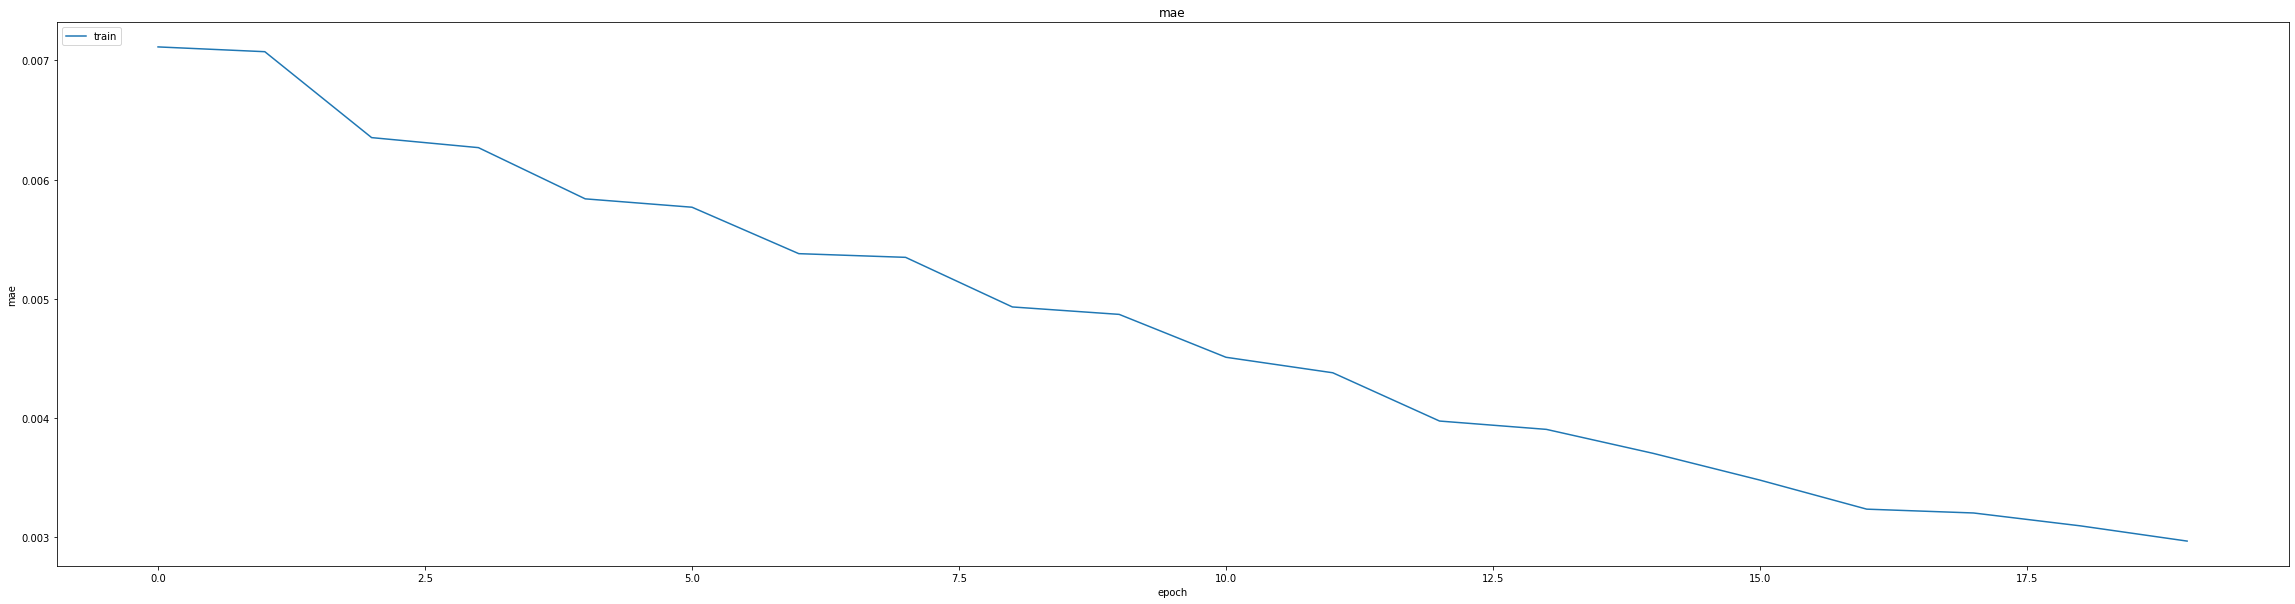

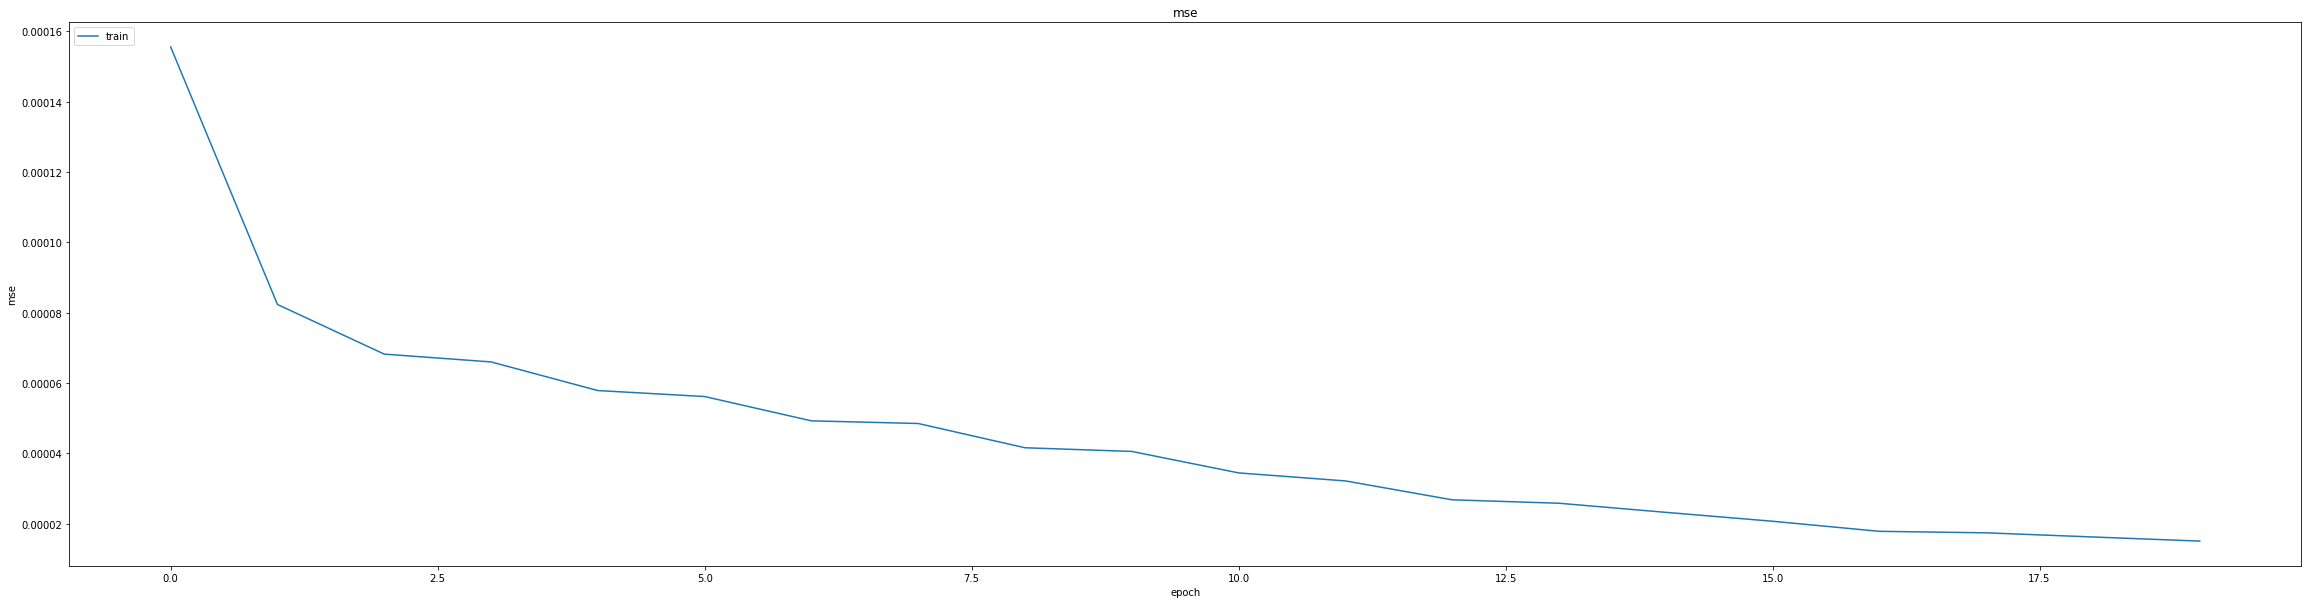

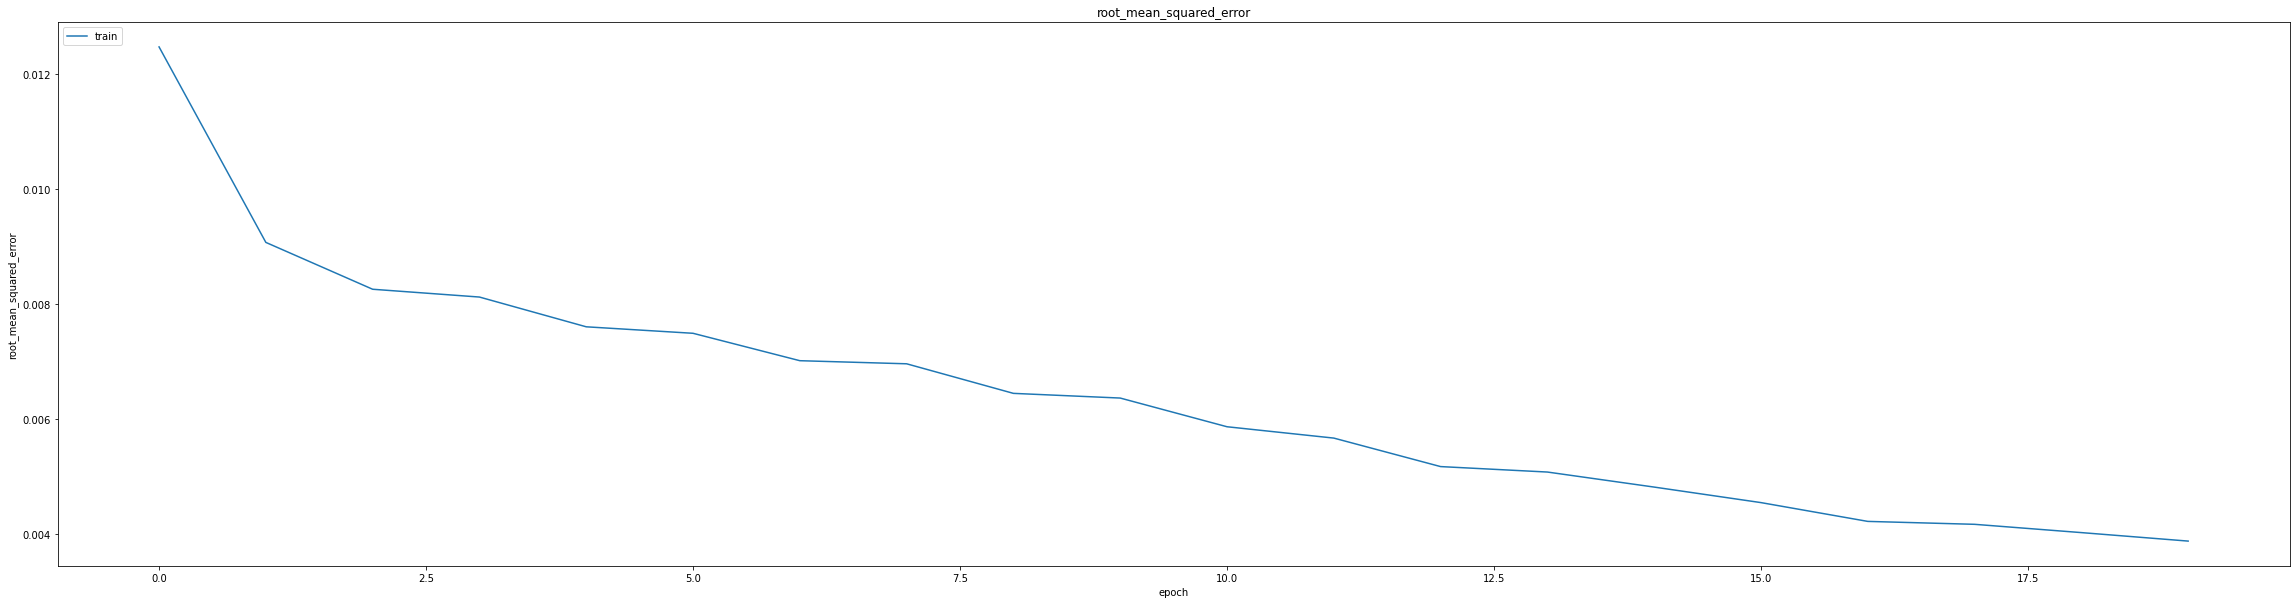

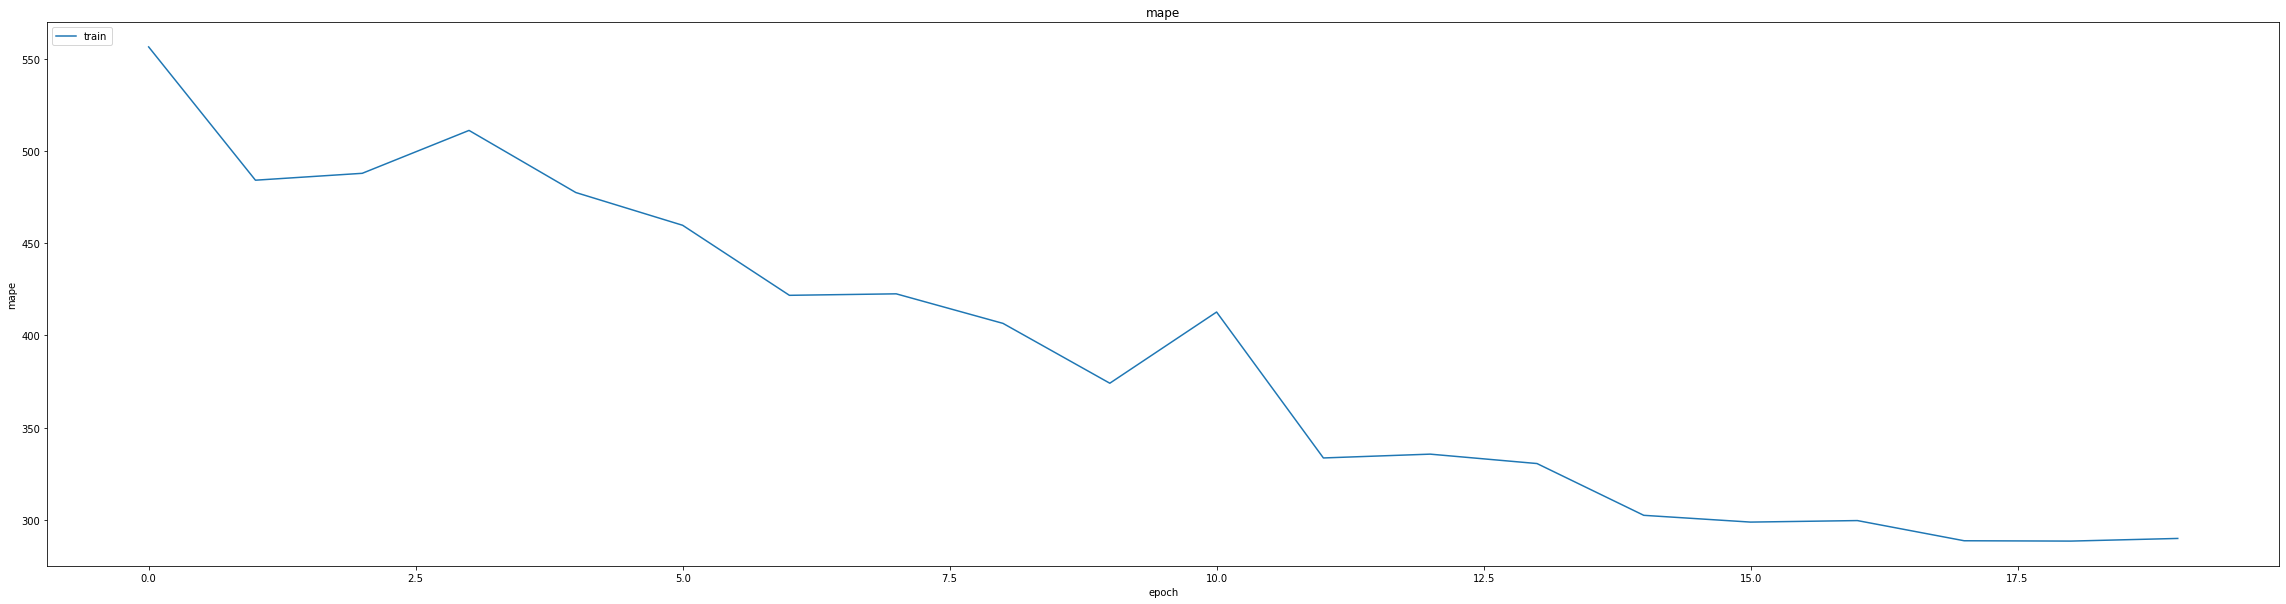

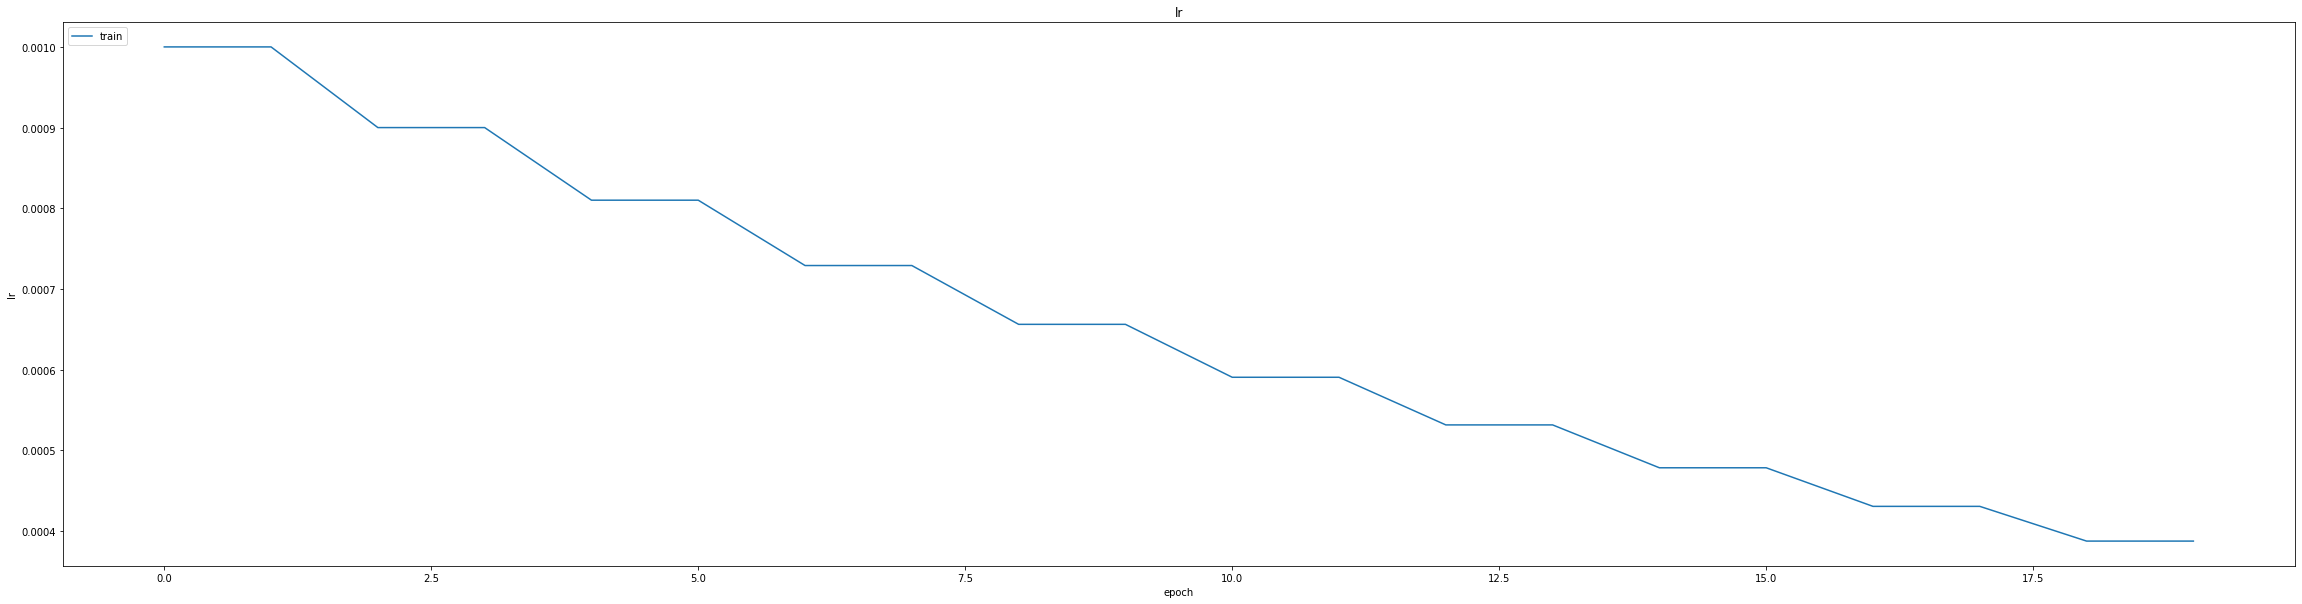

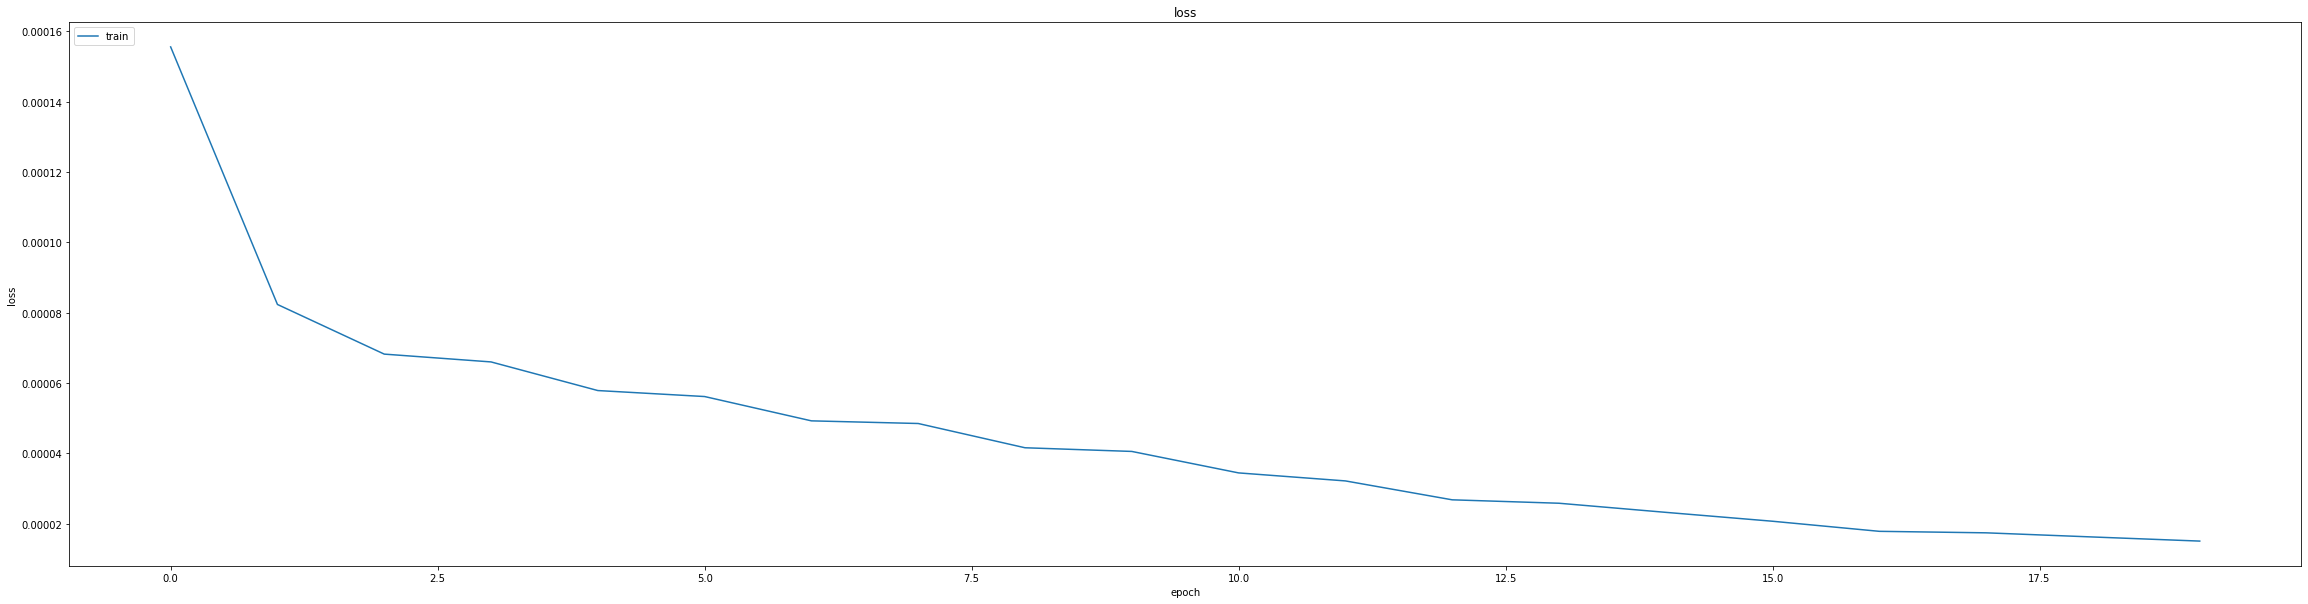

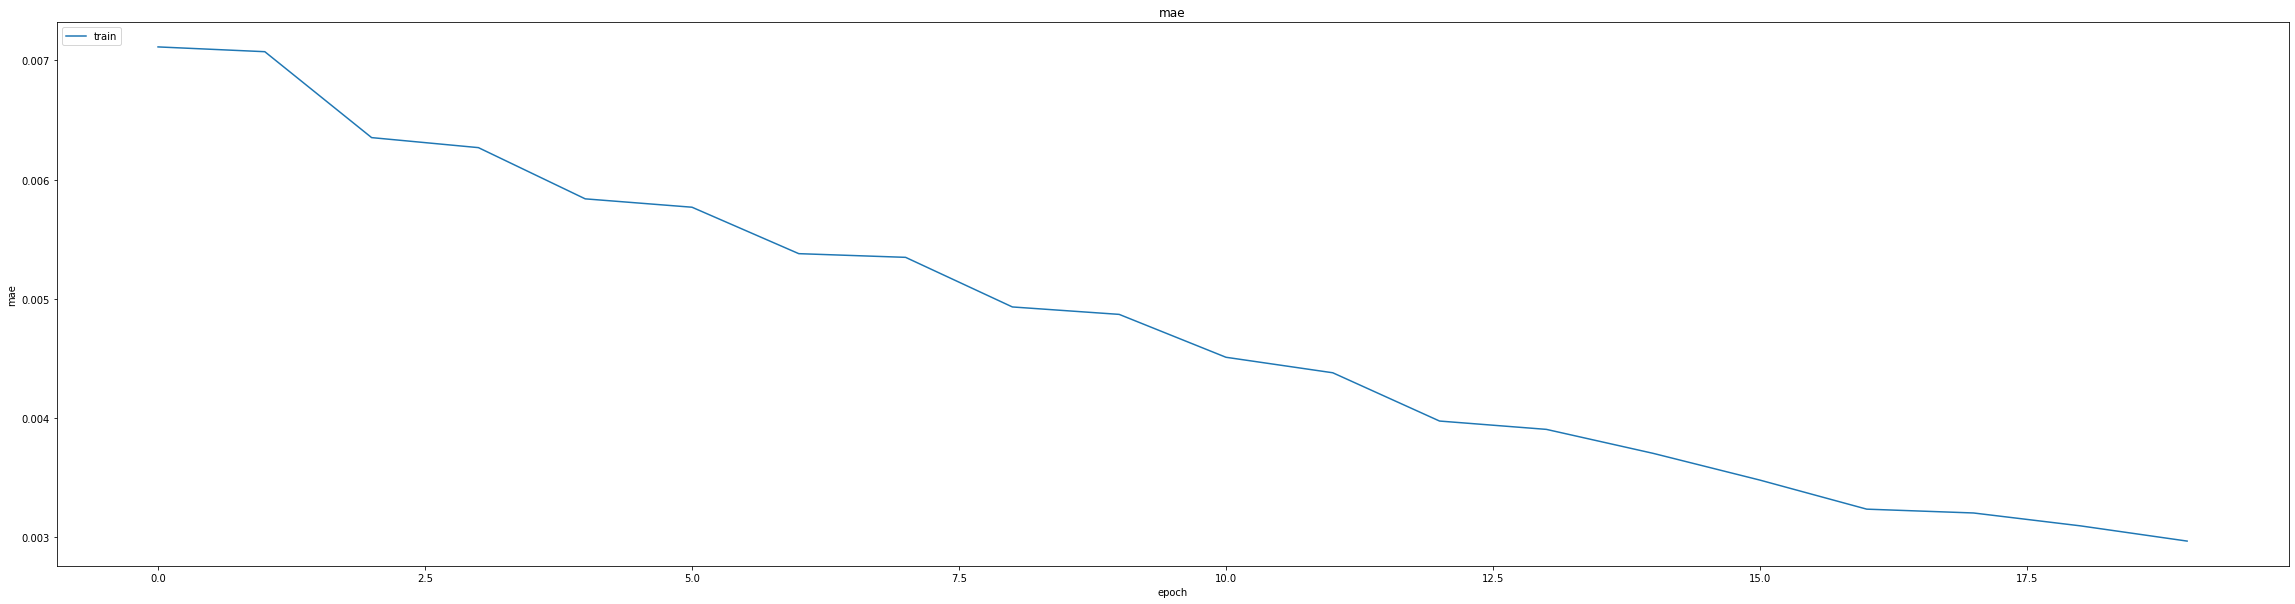

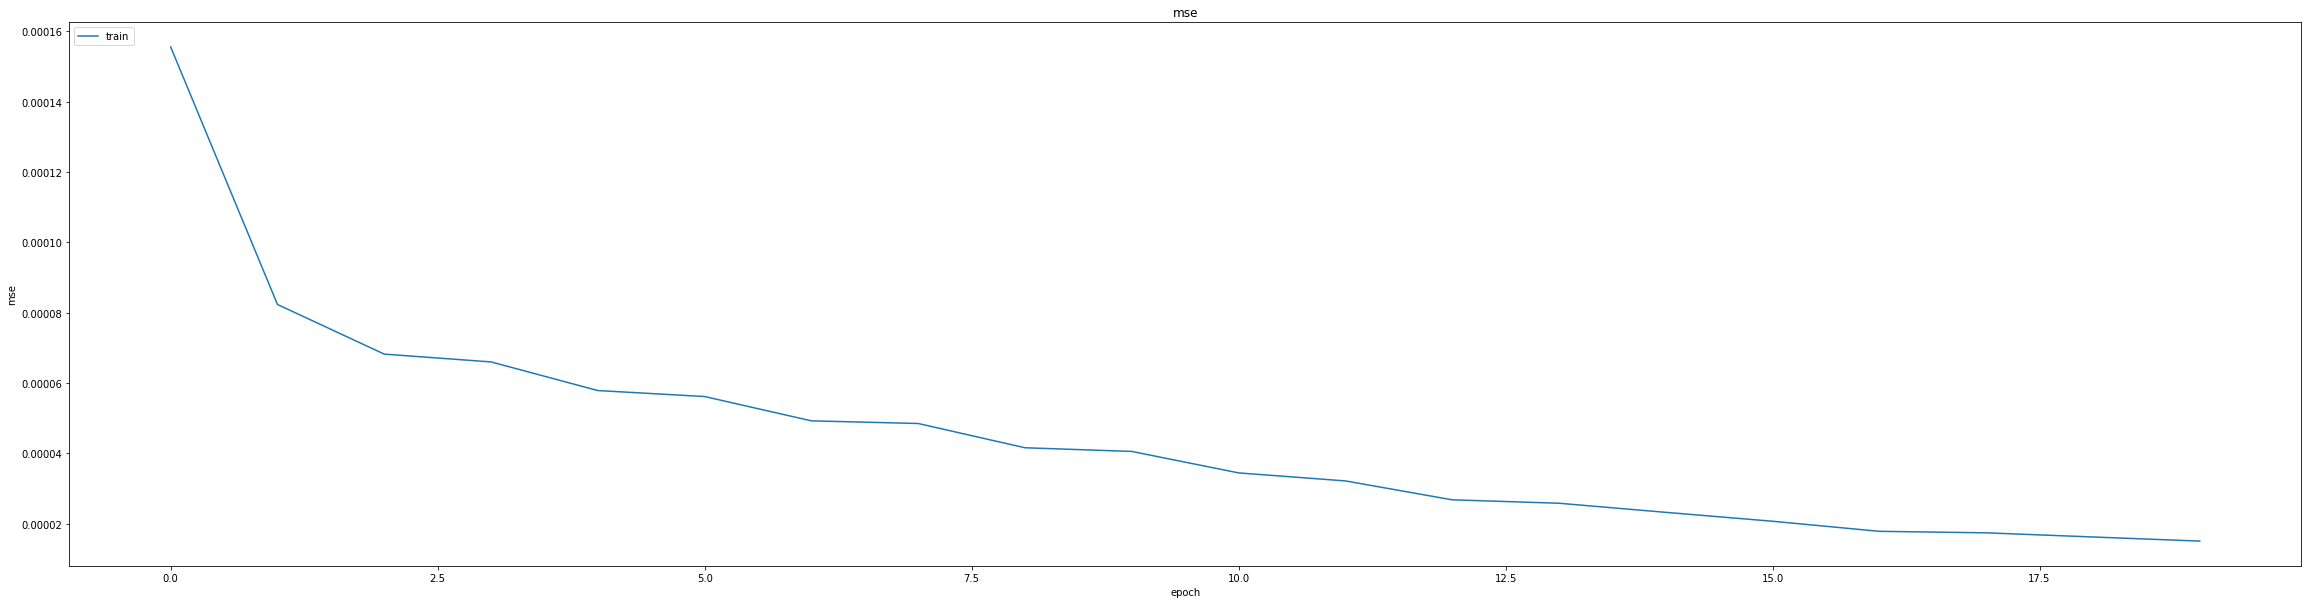

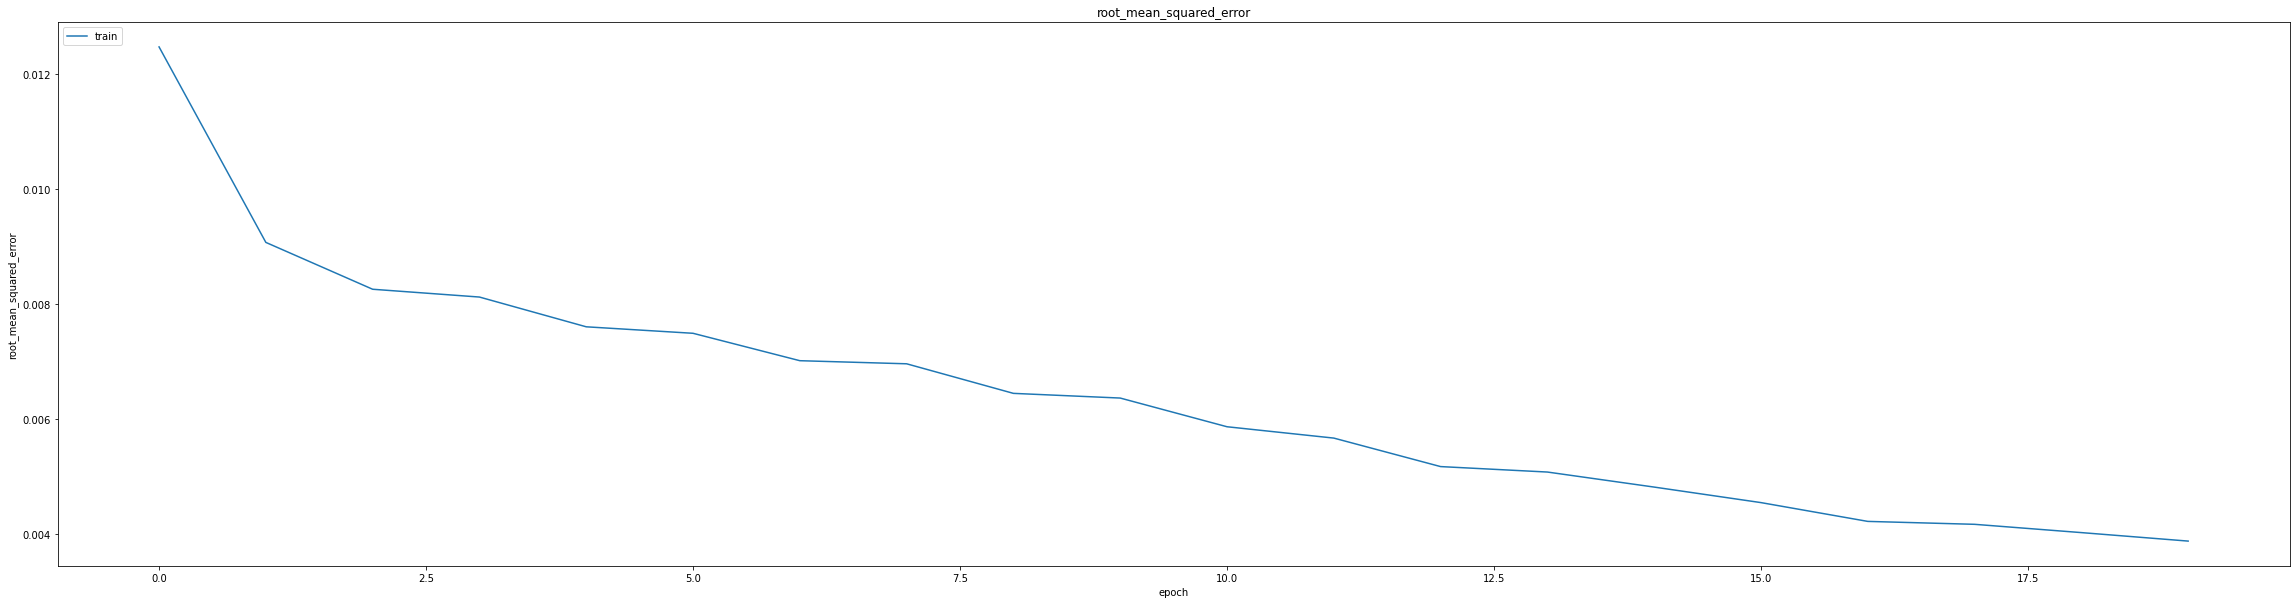

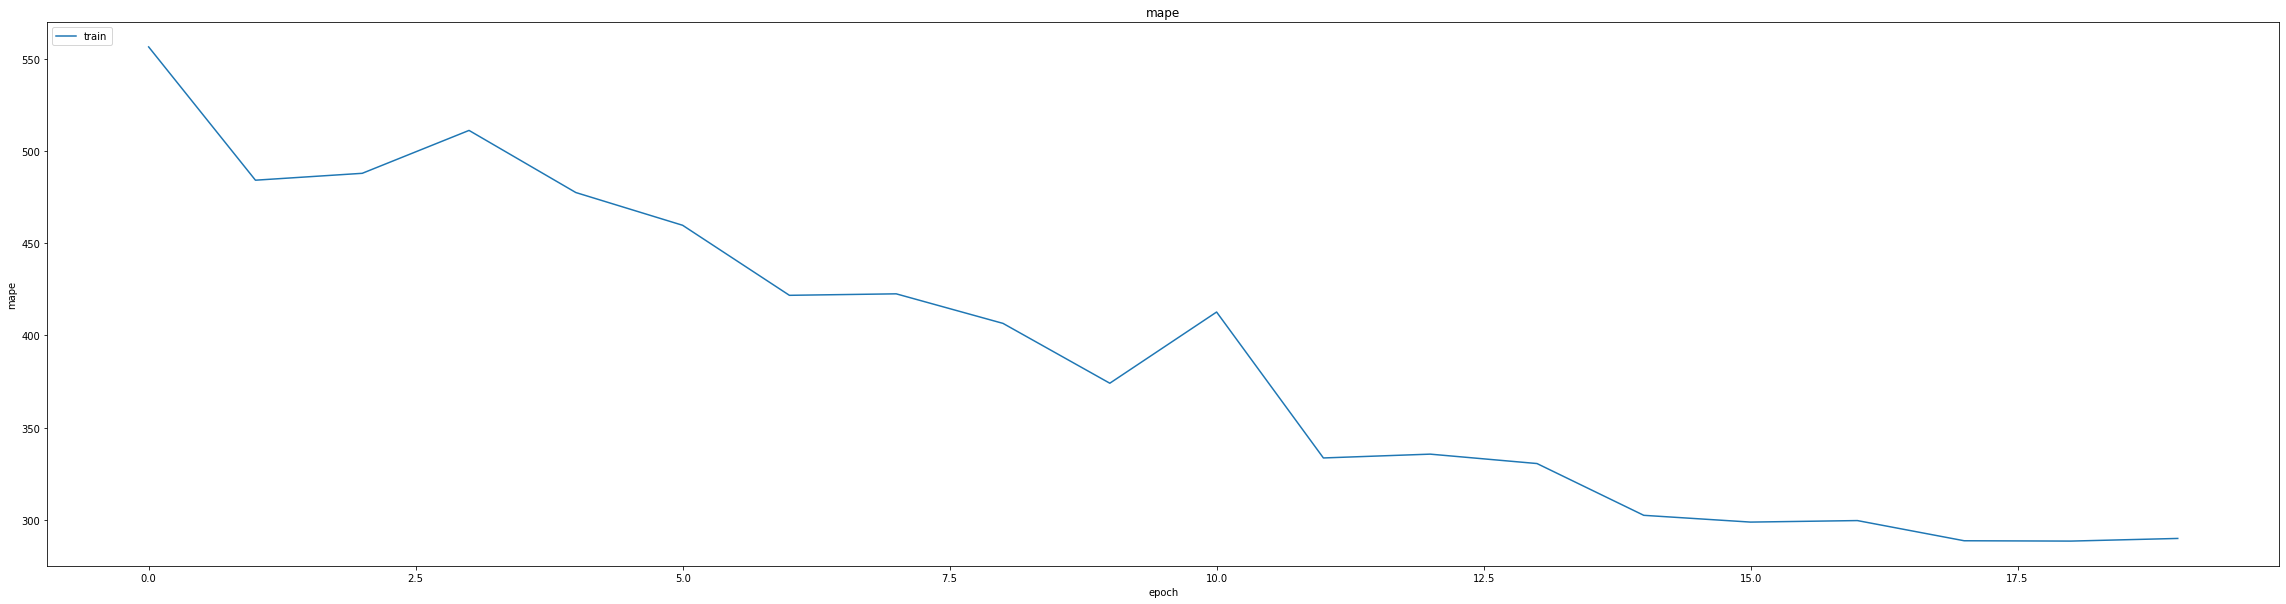

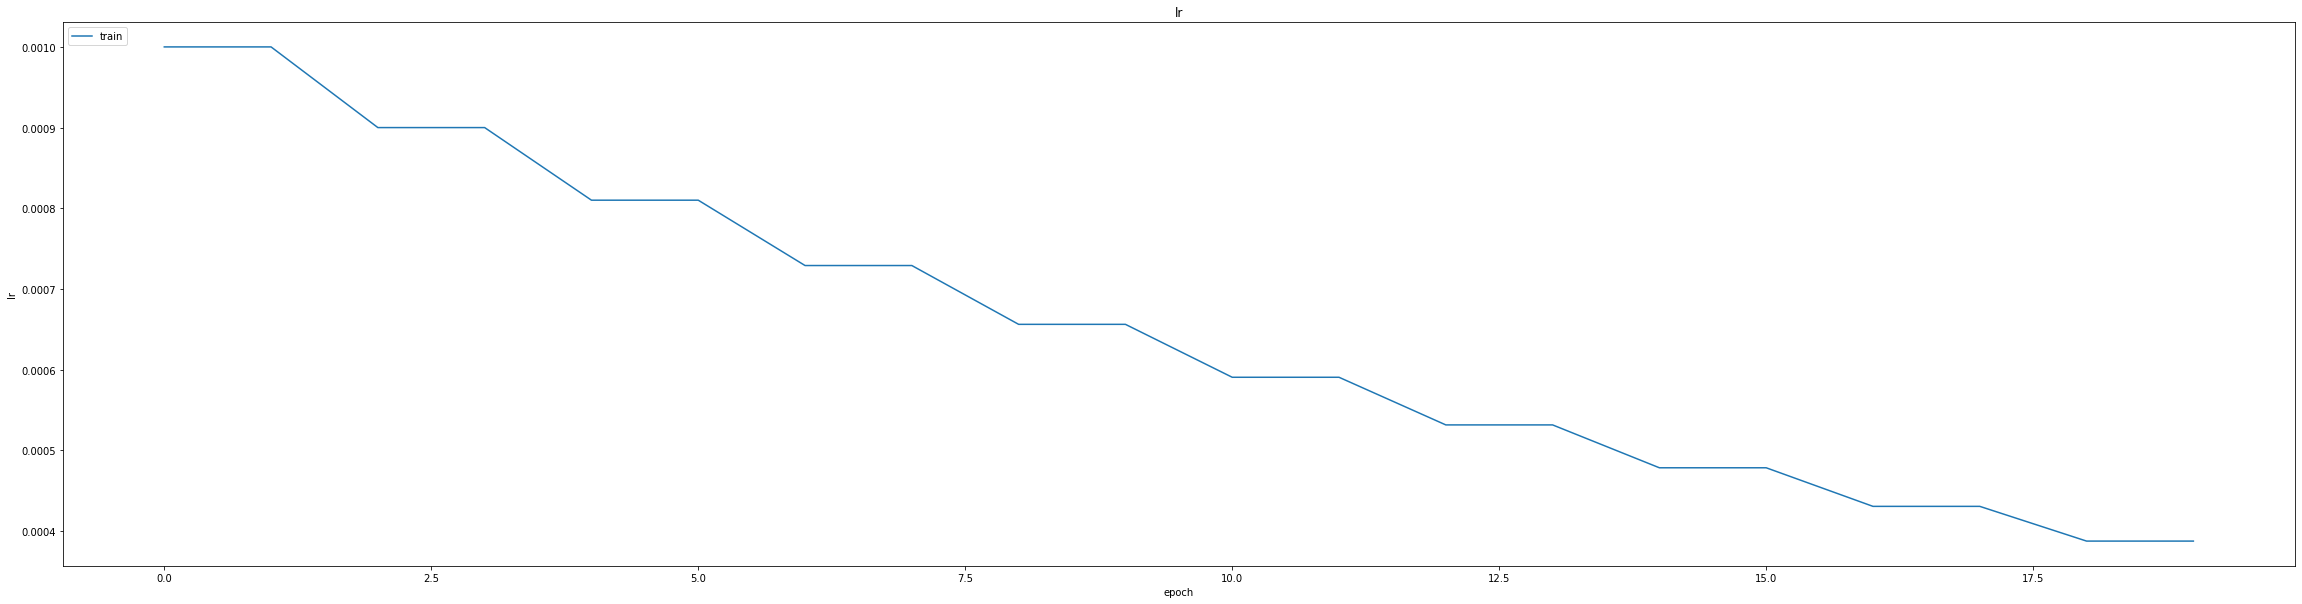

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01336435042321682
0.01695730723440647
687/687 [==============================] - 22s 31ms/step
0.9885537700454479


687/687 [==============================] - 18s 26ms/step


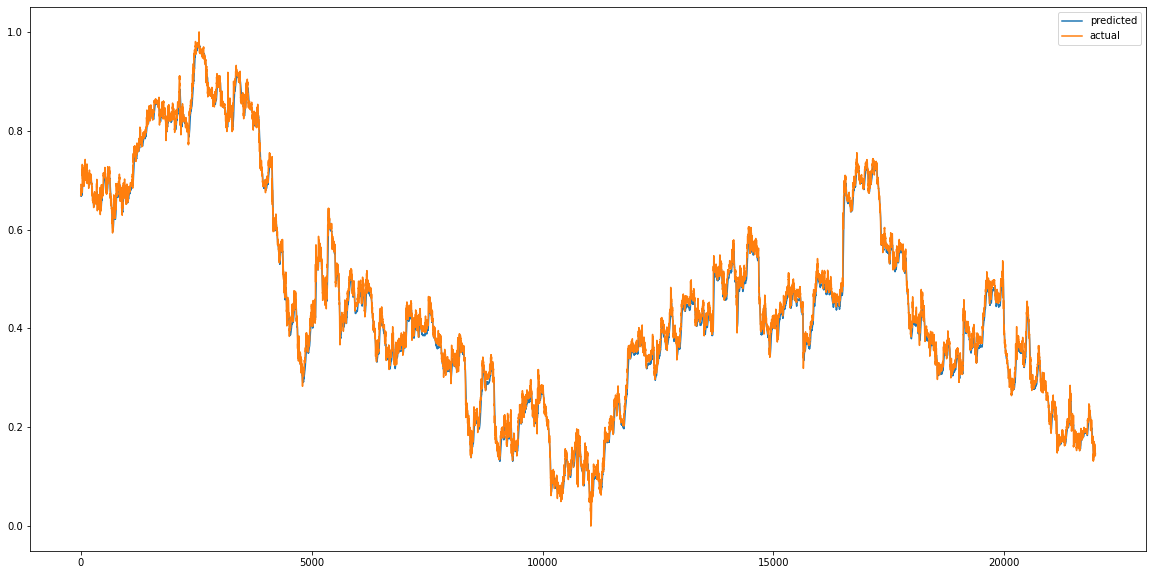

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD5_GRU.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


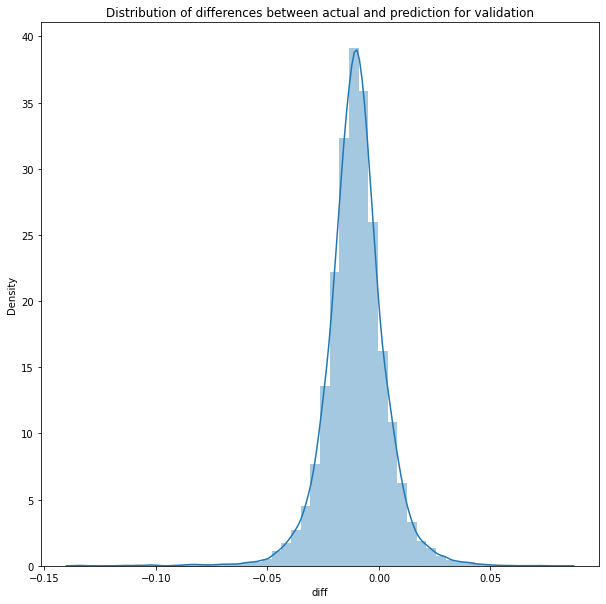

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 18s 26ms/step


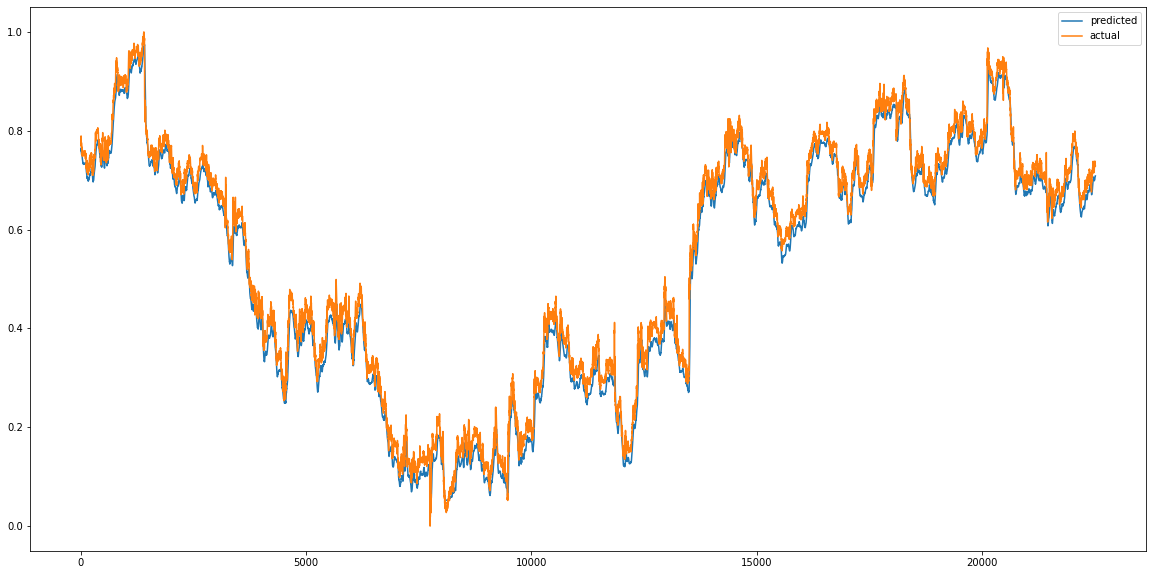

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


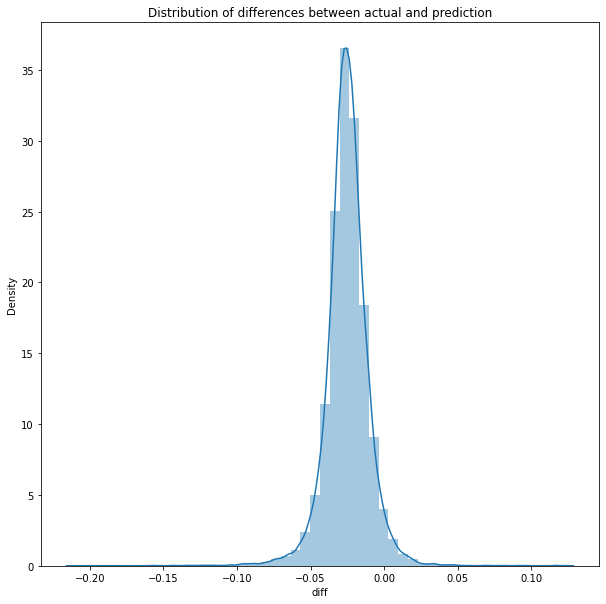

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0008633657166788134
MAE :  0.026037779051858657
RMSE  : 0.029383085554087293
704/704 [==============================] - 20s 28ms/step
R2_Score  : 0.9858663194506194


count    22513.000000
mean        -0.025233
std          0.015056
min         -0.209775
25%         -0.032329
50%         -0.025235
75%         -0.017675
max          0.122526
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("ADU5min_GRU_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
460/463 [============================>.] - ETA: 0s - loss: 202.8340 - mae: 1.8648 - mse: 202.8340 - root_mean_squared_error: 14.2420 - mape: 1905.7214
Epoch 1: val_mse improved from inf to 0.04757, saving model to ADU5min_GRU_BiLSTM.hdf5
463/463 [==============================] - 22s 19ms/step - loss: 201.6651 - mae: 1.8556 - mse: 201.6651 - root_mean_squared_error: 14.2009 - mape: 1894.9708 - val_loss: 0.0476 - val_mae: 0.1666 - val_mse: 0.0476 - val_root_mean_squared_error: 0.2181 - val_mape: 19231.1113
Epoch 2/60
460/463 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1578 - mse: 0.0390 - root_mean_squared_error: 0.1974 - mape: 3091.0894
Epoch 2: val_mse did not improve from 0.04757
463/463 [==============================] - 7s 15ms/step - loss: 0.0389 - mae: 0.1576 - mse: 0.0389 - root_mean_squared_error: 0.1973 - mape: 3073.4387 - val_loss: 0.0908 - val_mae: 0.2640 - val_mse: 0.0908 - val_root_mean_squared_error: 0.3013 - val_mape: 30943.6133
Epoch 3/

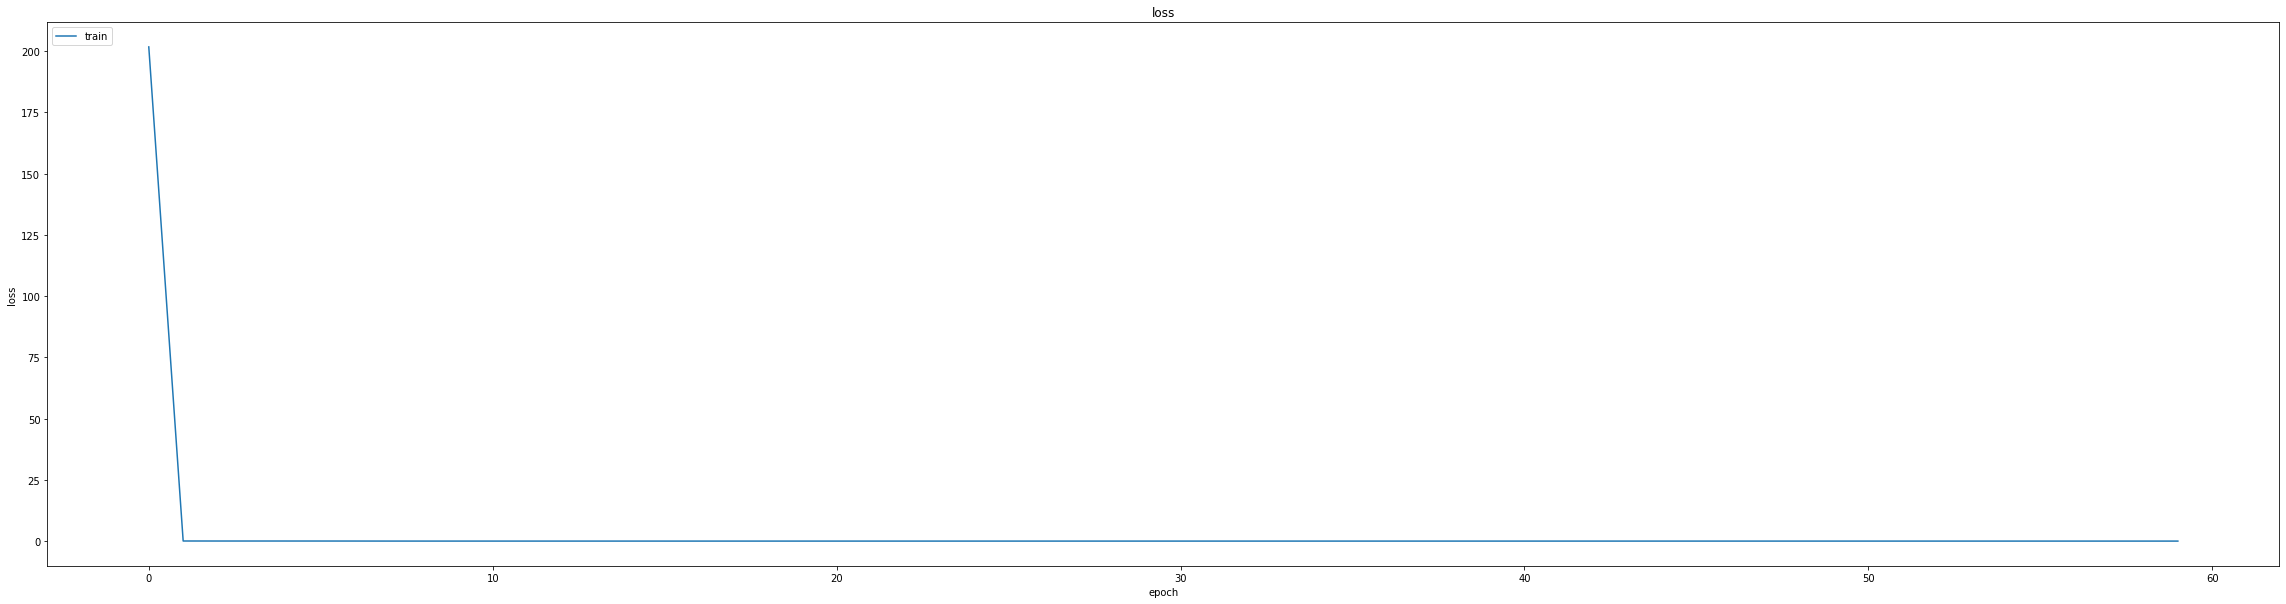

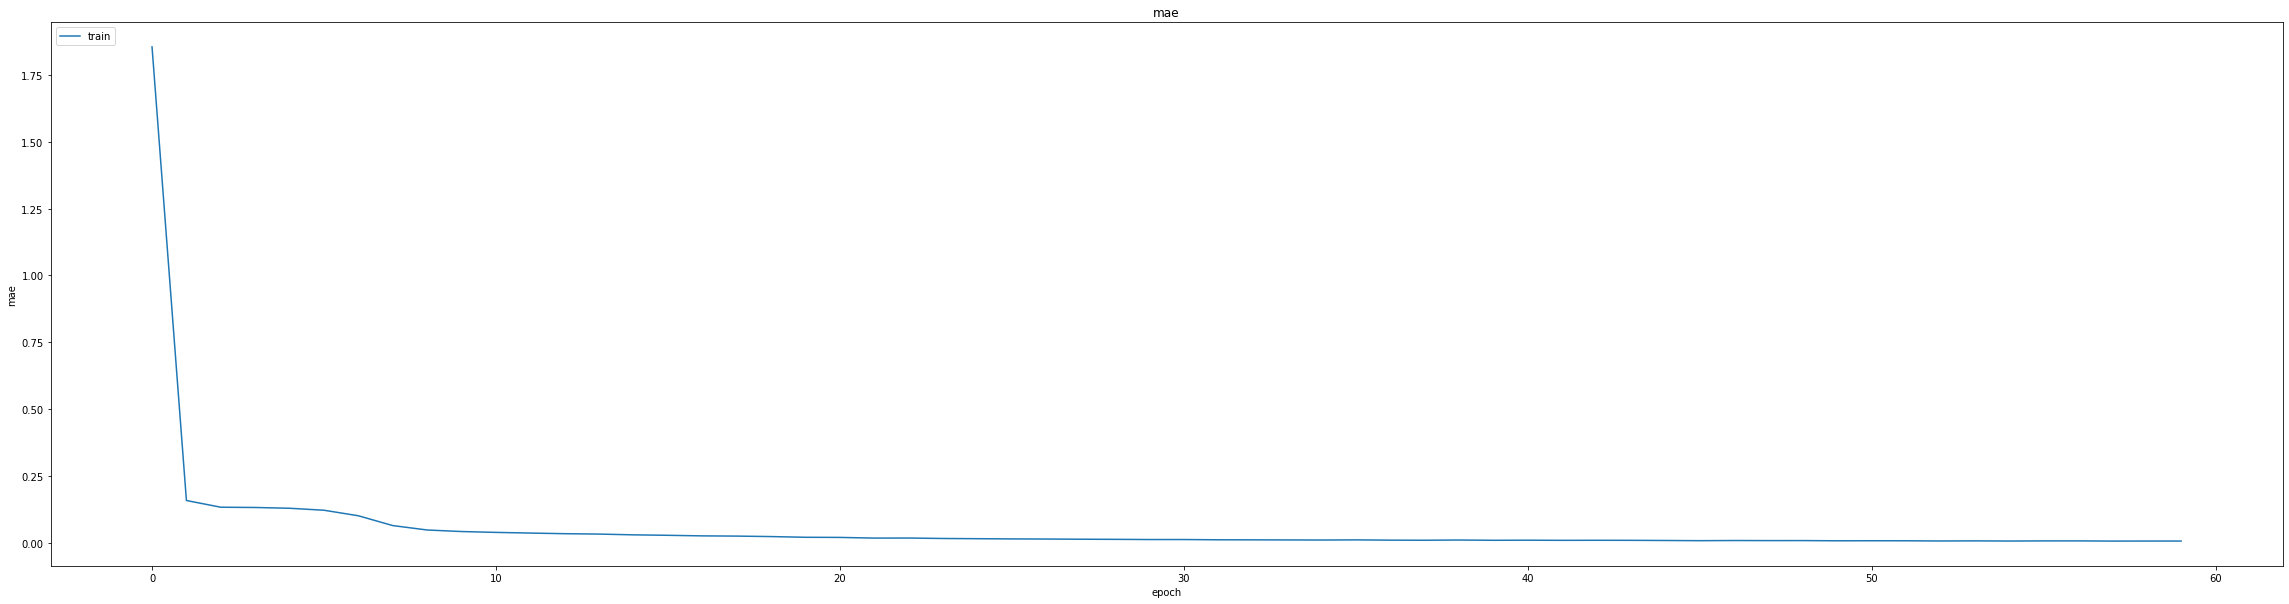

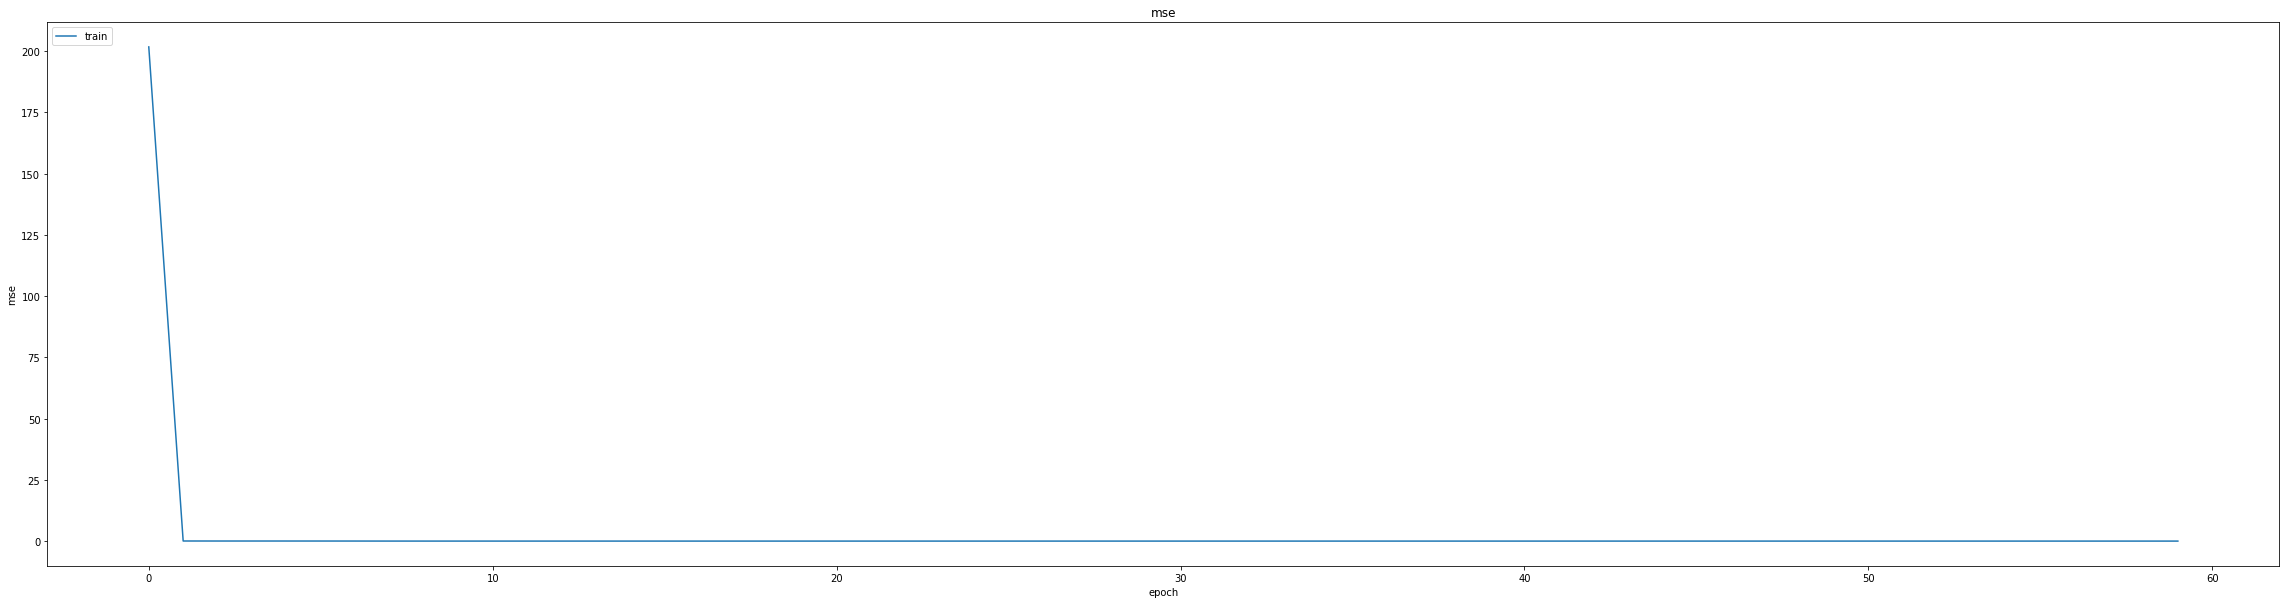

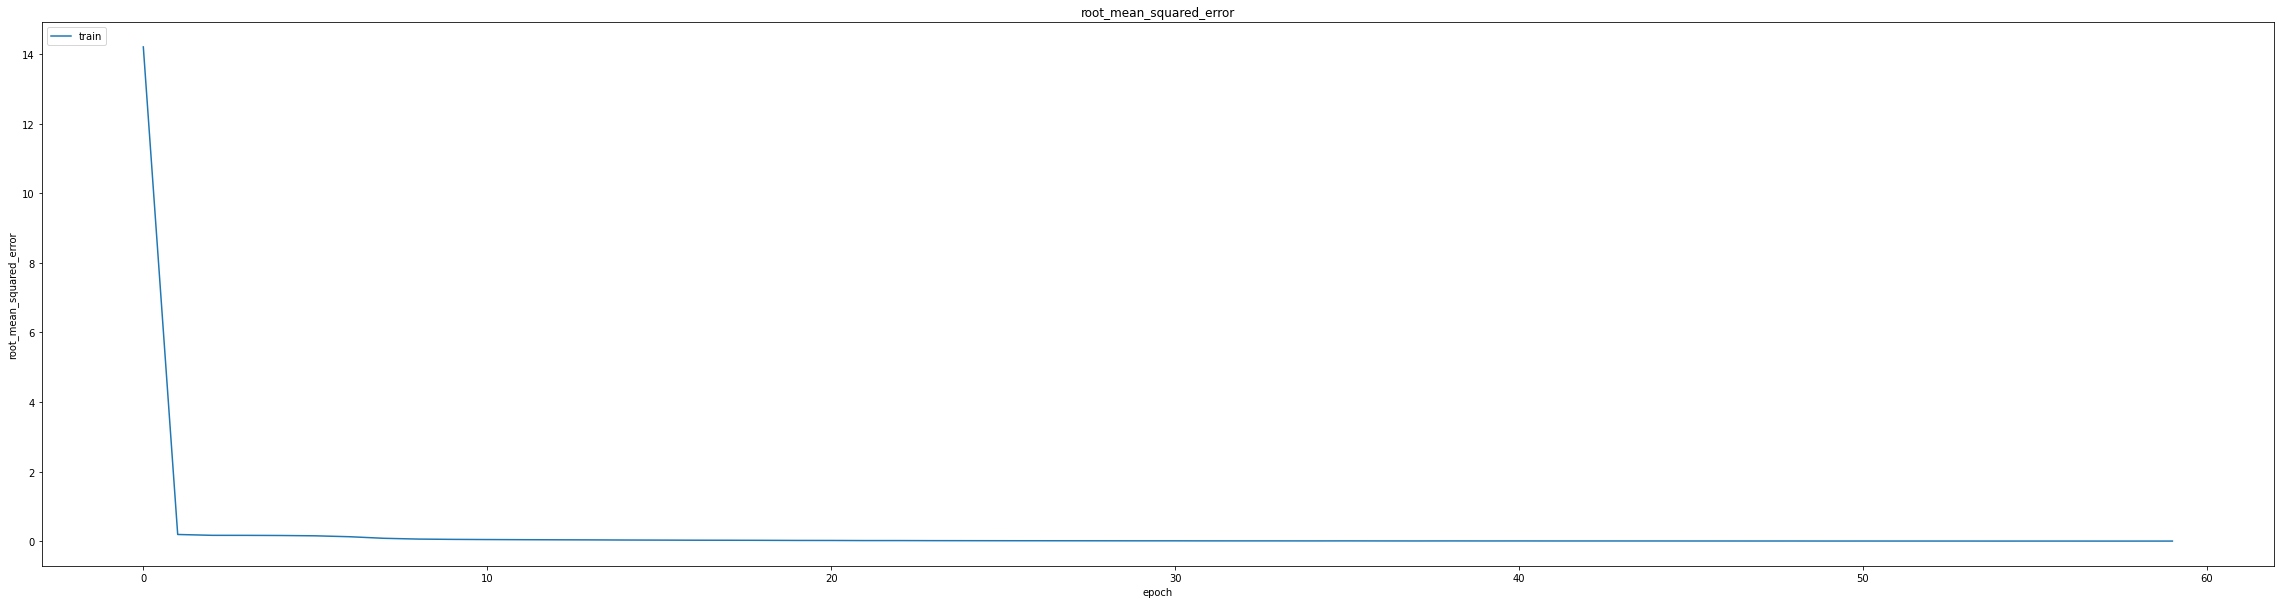

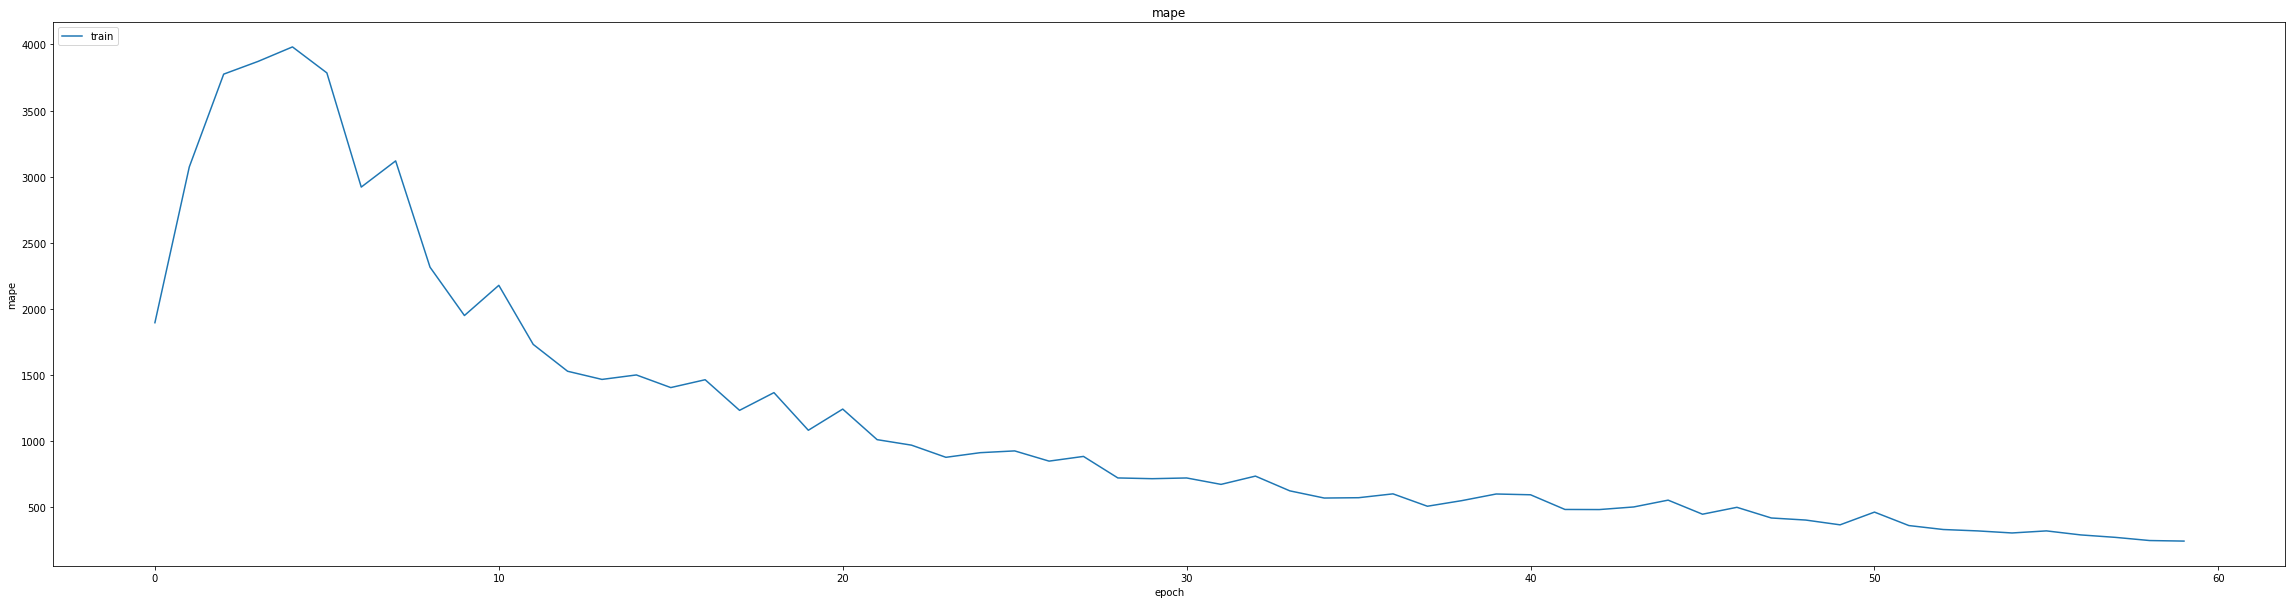

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00909961573779583
0.012751211412250996
687/687 [==============================] - 5s 5ms/step
0.9963823164689392


In [ ]:
model.load_weights("/content/ADU5min_GRU_BiLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
461/463 [============================>.] - ETA: 0s - loss: 3.8780e-04 - mae: 0.0071 - mse: 3.8780e-04 - root_mean_squared_error: 0.0197 - mape: 267.4749
Epoch 1: val_mse did not improve from 0.00016
463/463 [==============================] - 16s 19ms/step - loss: 3.8646e-04 - mae: 0.0071 - mse: 3.8646e-04 - root_mean_squared_error: 0.0197 - mape: 266.5132 - val_loss: 2.2933e-04 - val_mae: 0.0125 - val_mse: 2.2933e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 2444.7698 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.1104e-05 - mae: 0.0026 - mse: 1.1104e-05 - root_mean_squared_error: 0.0033 - mape: 223.7201
Epoch 2: val_mse did not improve from 0.00016
463/463 [==============================] - 7s 15ms/step - loss: 1.1104e-05 - mae: 0.0026 - mse: 1.1104e-05 - root_mean_squared_error: 0.0033 - mape: 223.7201 - val_loss: 2.2871e-04 - val_mae: 0.0125 - val_mse: 2.2871e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 2496.4912 - lr

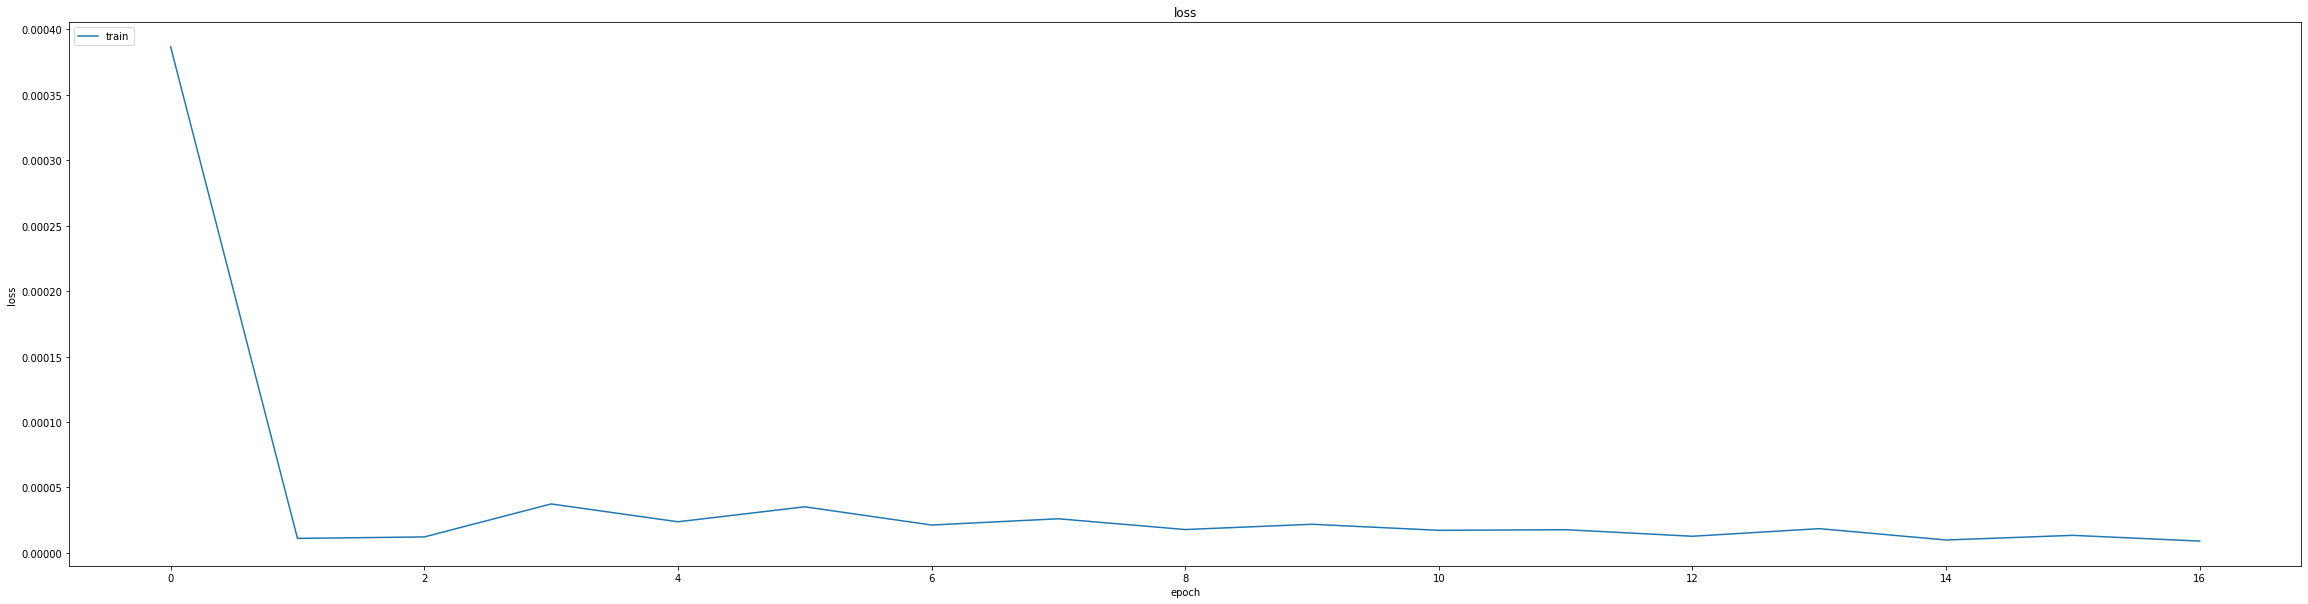

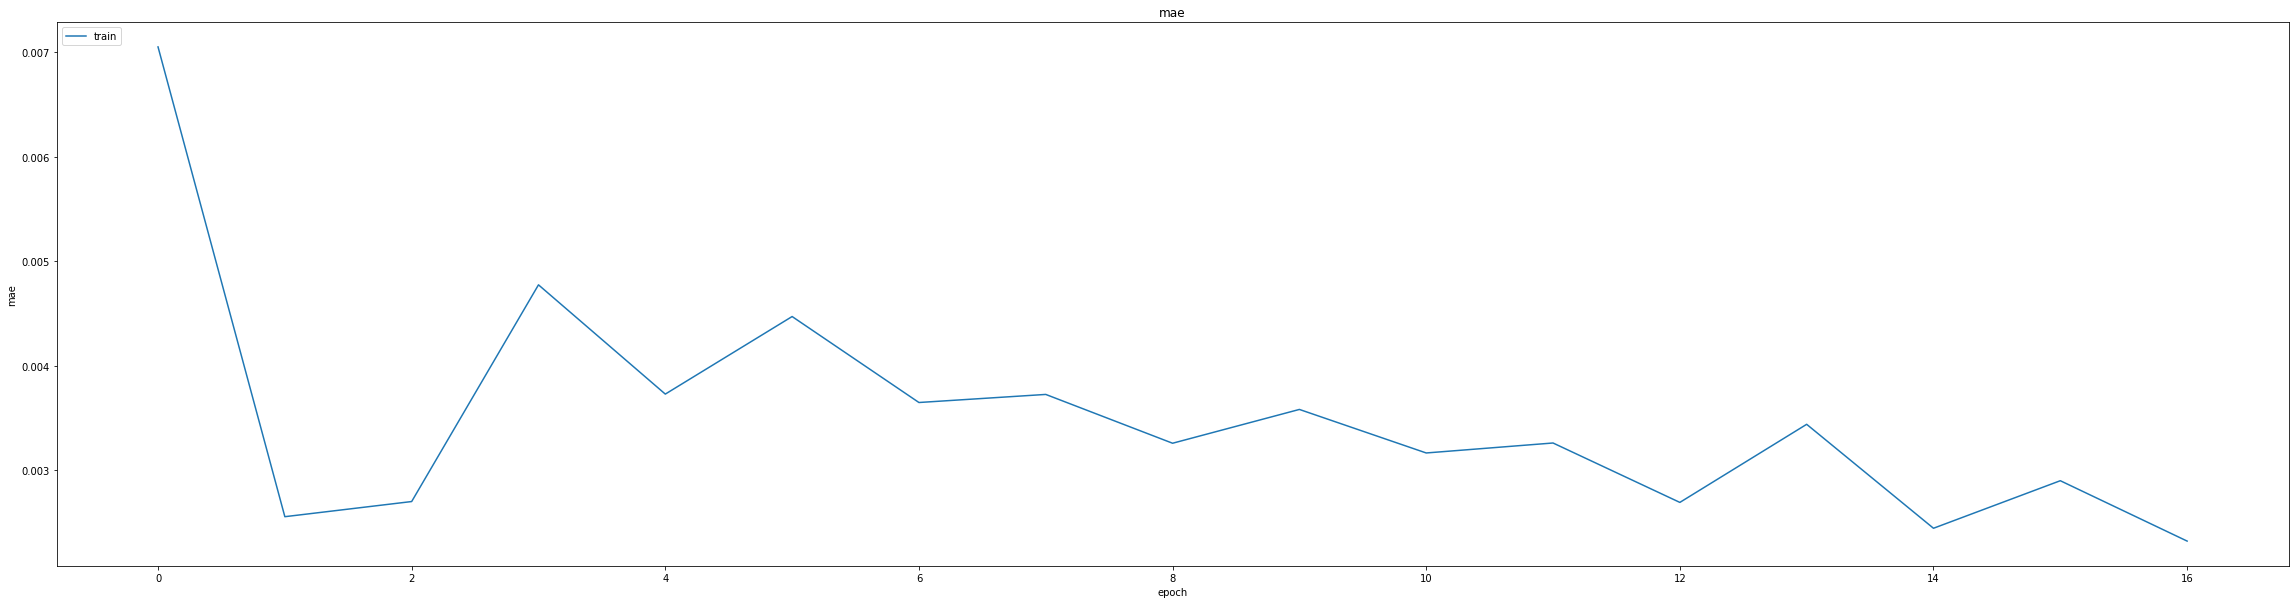

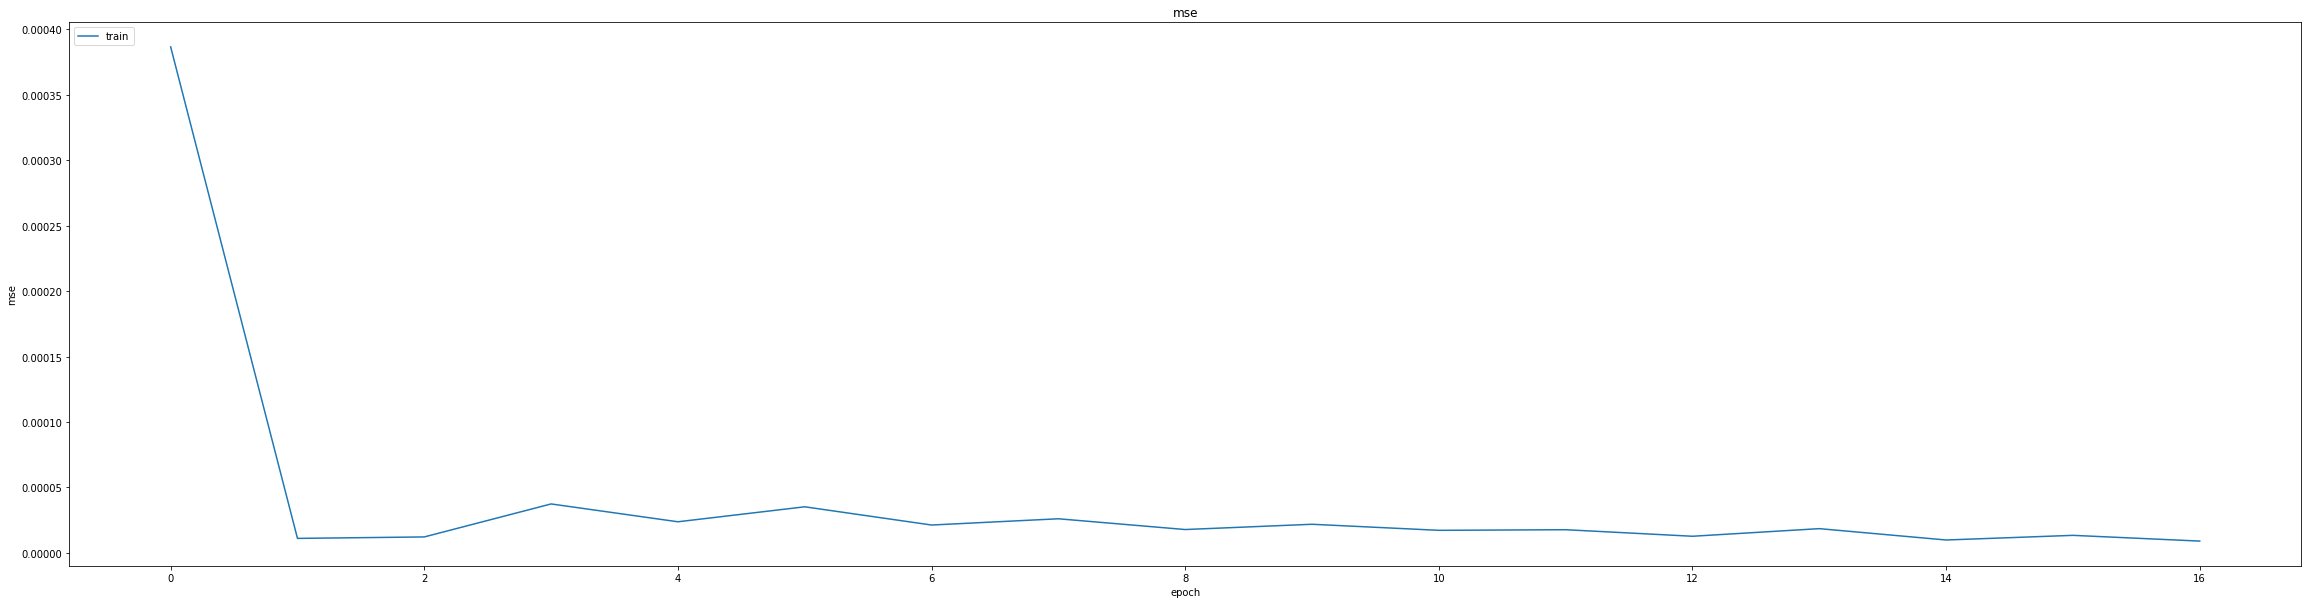

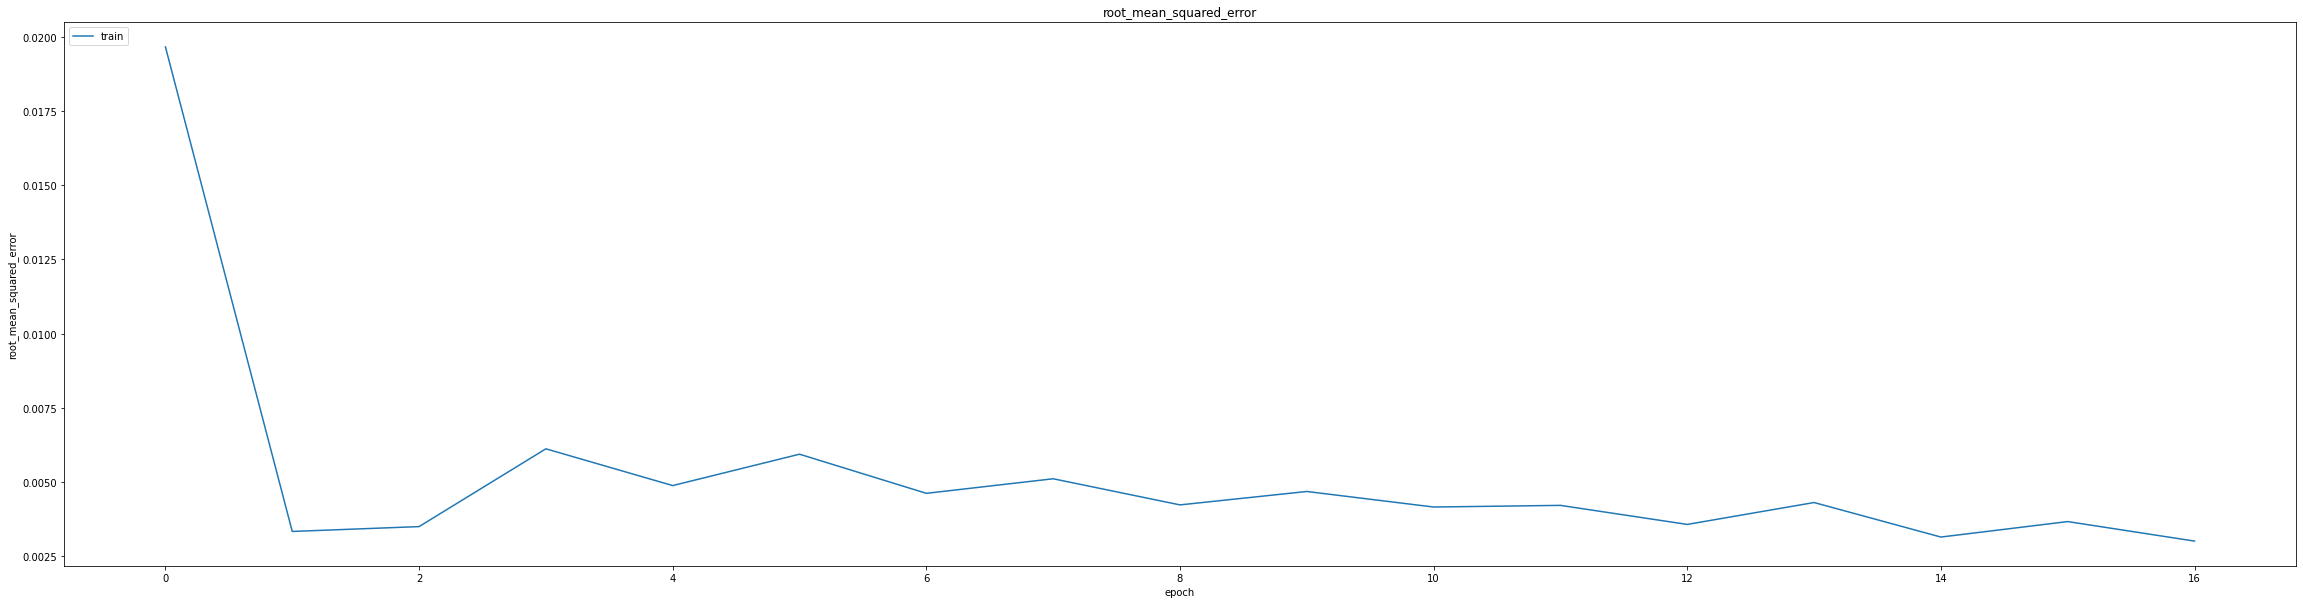

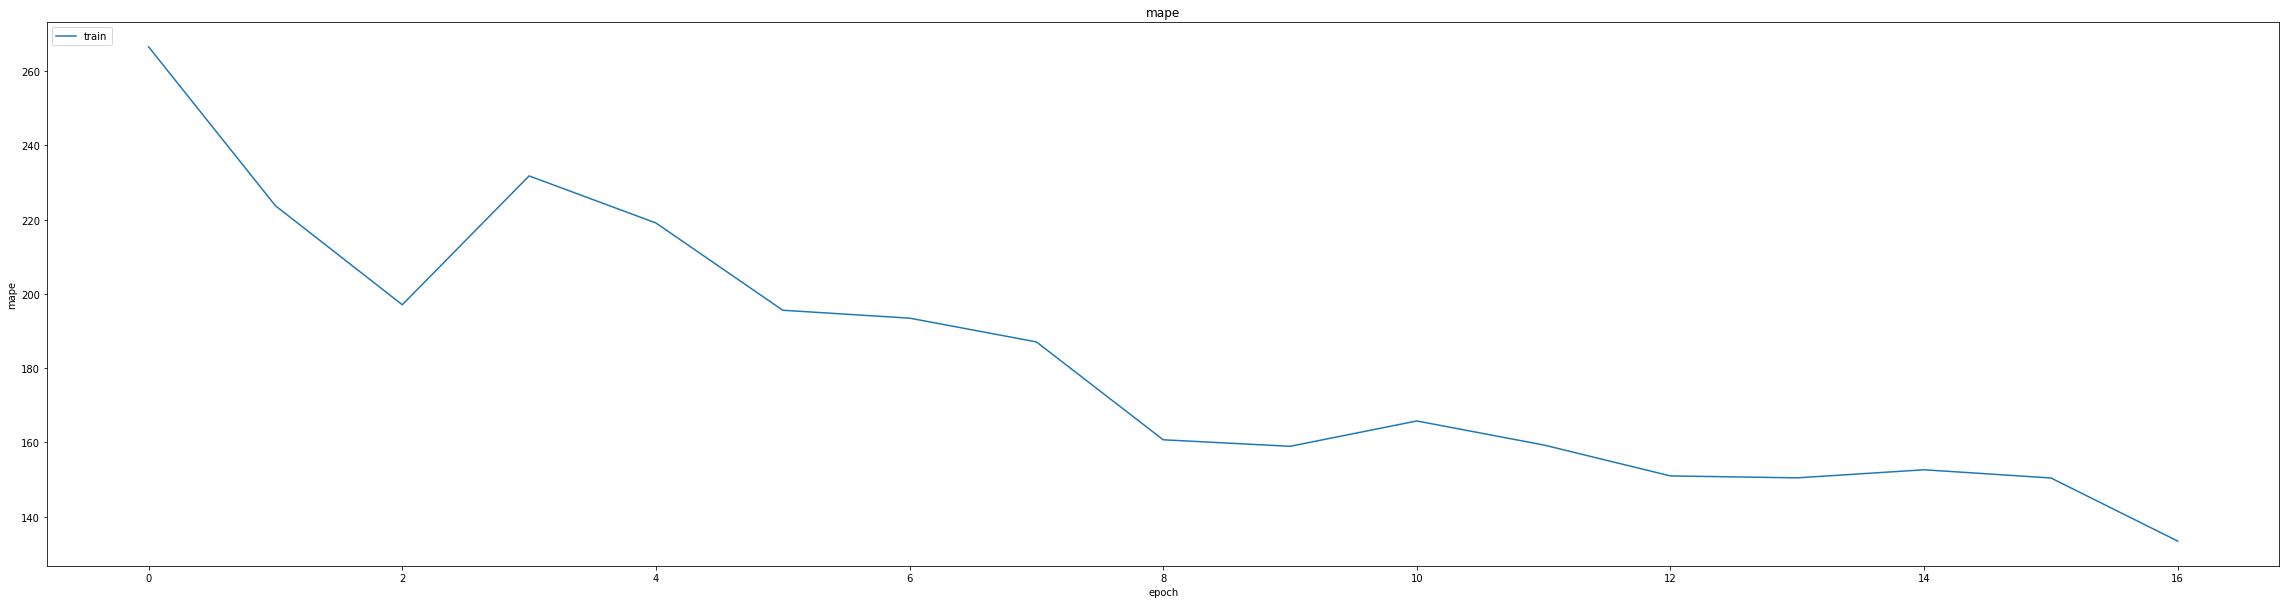

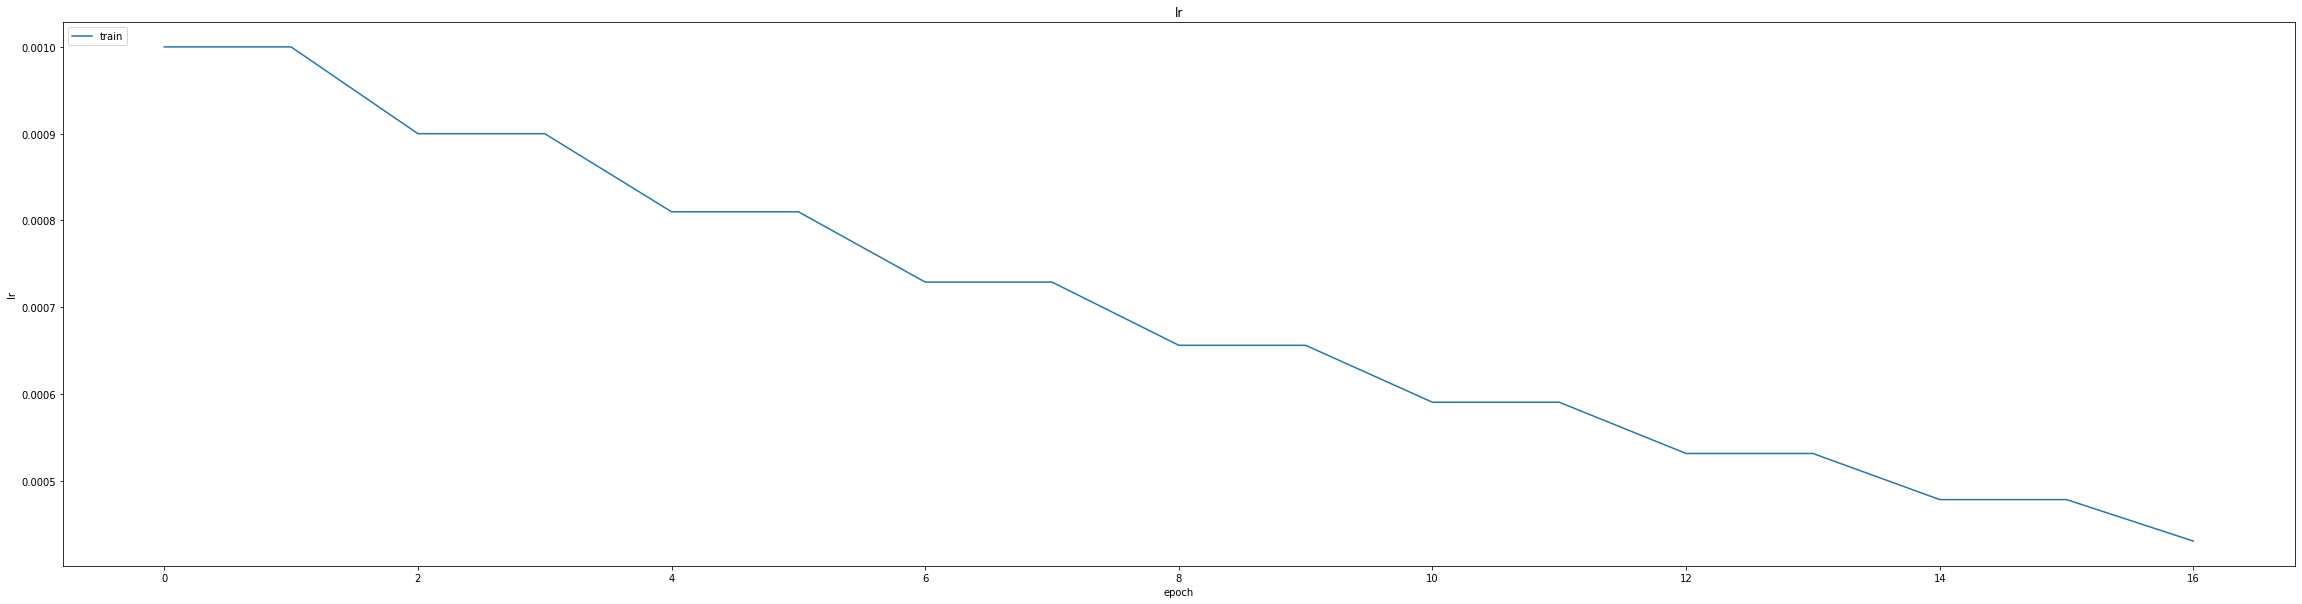

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009508071467280388
0.012256888672709465
687/687 [==============================] - 6s 6ms/step
0.9955514006692222


687/687 [==============================] - 4s 5ms/step


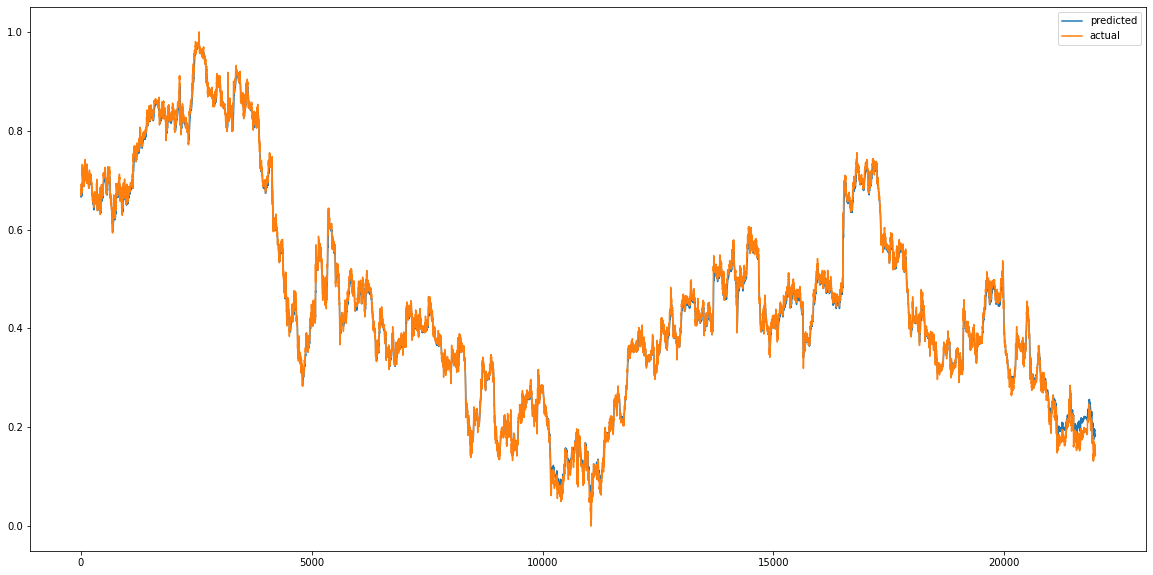

In [ ]:
model.load_weights("/content/ADU5min_GRU_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


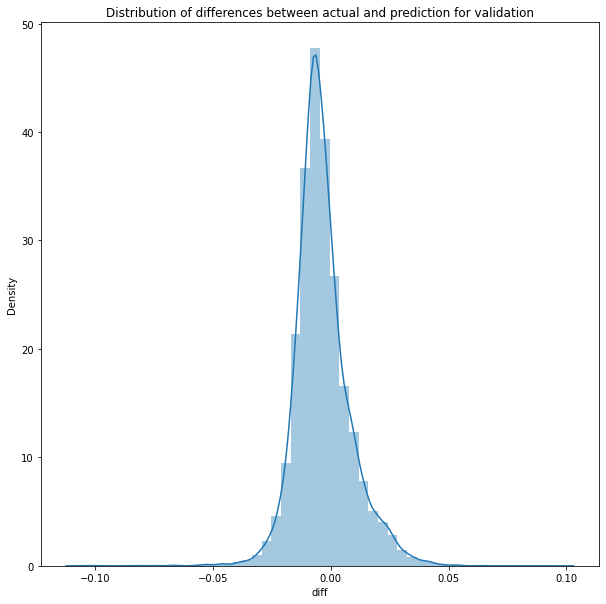

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 4s 6ms/step


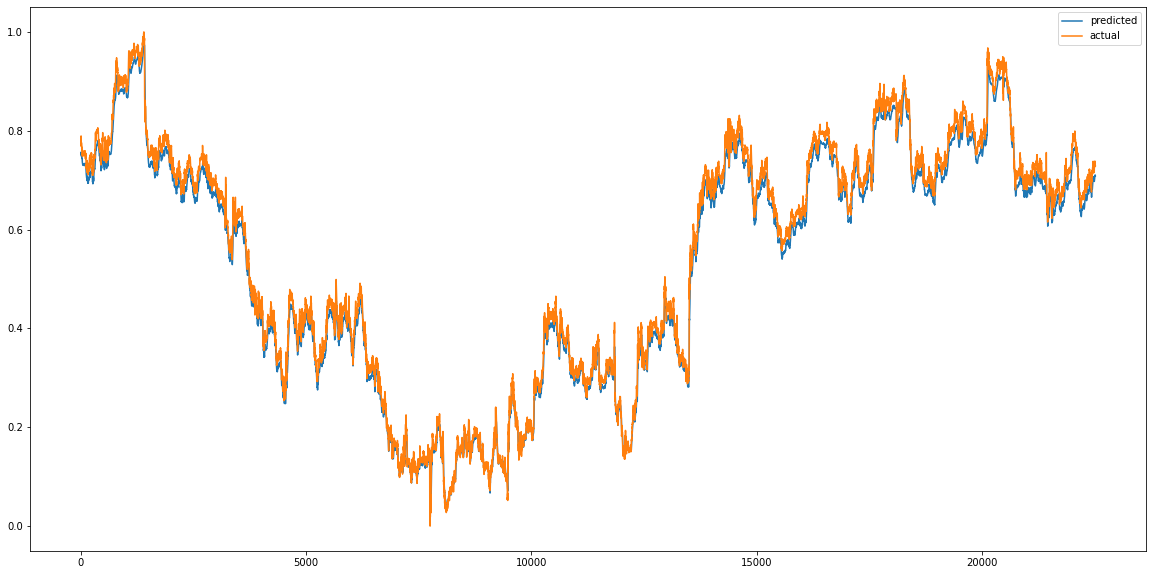

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


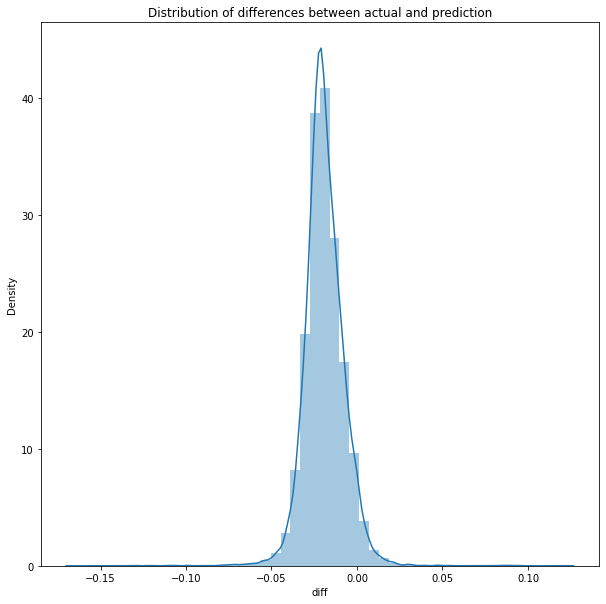

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0004984053367658678
MAE :  0.0197402894220909
RMSE  : 0.022324993544587373
704/704 [==============================] - 4s 6ms/step
R2_Score  : 0.9918408830967262


count    22513.000000
mean        -0.019026
std          0.011680
min         -0.165348
25%         -0.025602
50%         -0.019839
75%         -0.012604
max          0.121897
Name: diff, dtype: float64

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint





checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 72.3382 - mae: 0.9397 - mse: 72.3382 - root_mean_squared_error: 8.5052 - mape: 3694.1116
Epoch 1: val_mse improved from inf to 0.06323, saving model to weights.best.hdf5
463/463 [==============================] - 328s 695ms/step - loss: 72.3382 - mae: 0.9397 - mse: 72.3382 - root_mean_squared_error: 8.5052 - mape: 3694.1116 - val_loss: 0.0632 - val_mae: 0.2200 - val_mse: 0.0632 - val_root_mean_squared_error: 0.2514 - val_mape: 27128.9121
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0300 - mae: 0.1361 - mse: 0.0300 - root_mean_squared_error: 0.1731 - mape: 3823.4287
Epoch 2: val_mse did not improve from 0.06323
463/463 [==============================] - 317s 684ms/step - loss: 0.0300 - mae: 0.1361 - mse: 0.0300 - root_mean_squared_error: 0.1731 - mape: 3823.4287 - val_loss: 0.0855 - val_mae: 0.2565 - val_mse: 0.0855 - val_root_mean_squared_error: 0.2923 - val_mape: 30166.5684
Epoch 3/60
463/

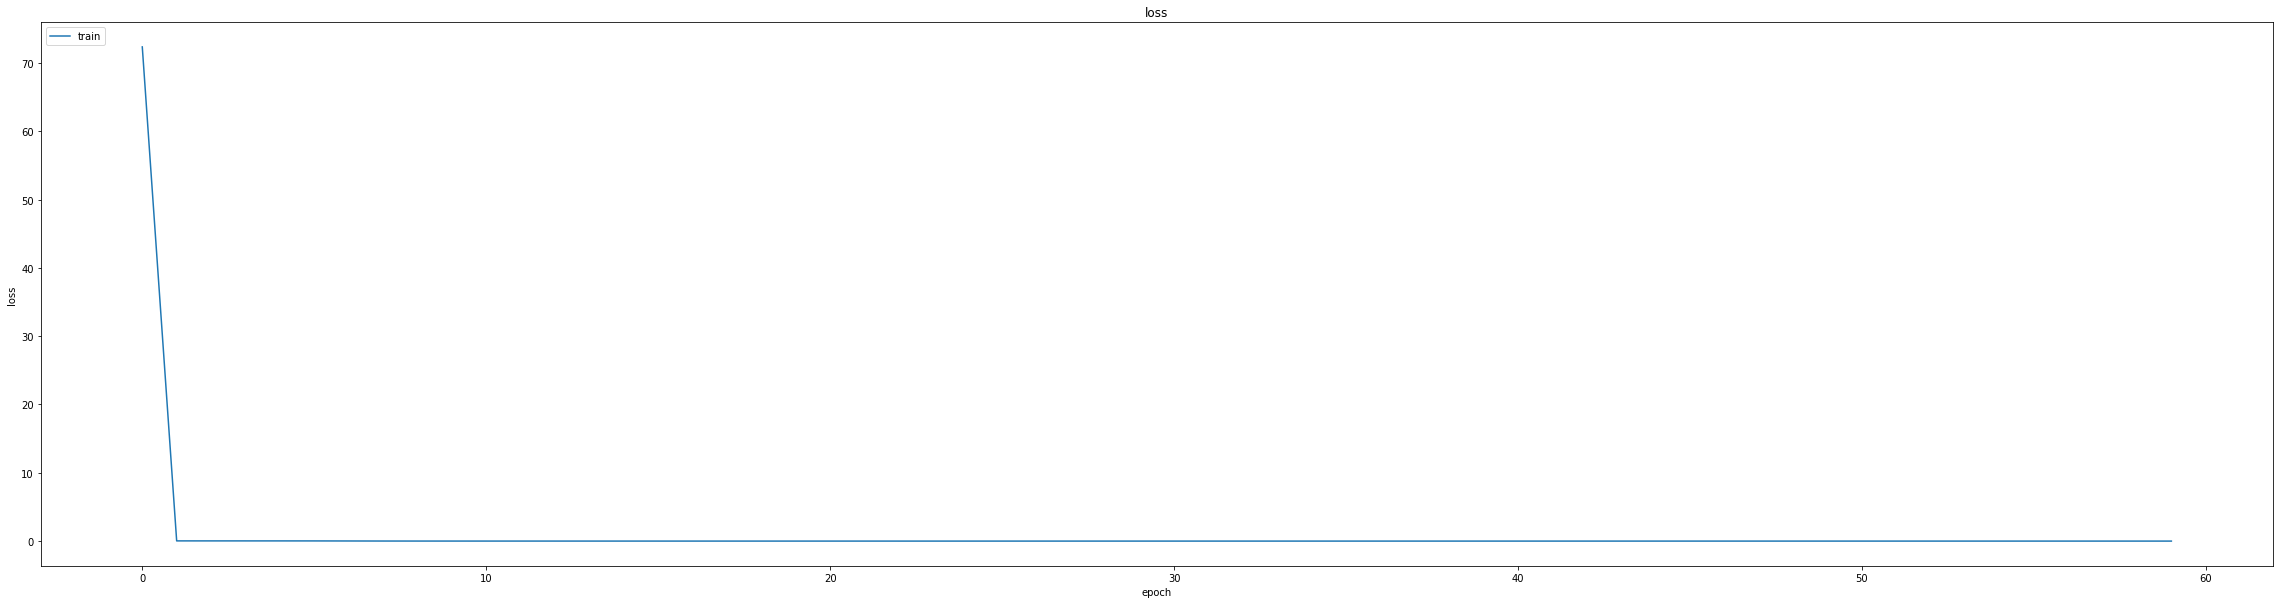

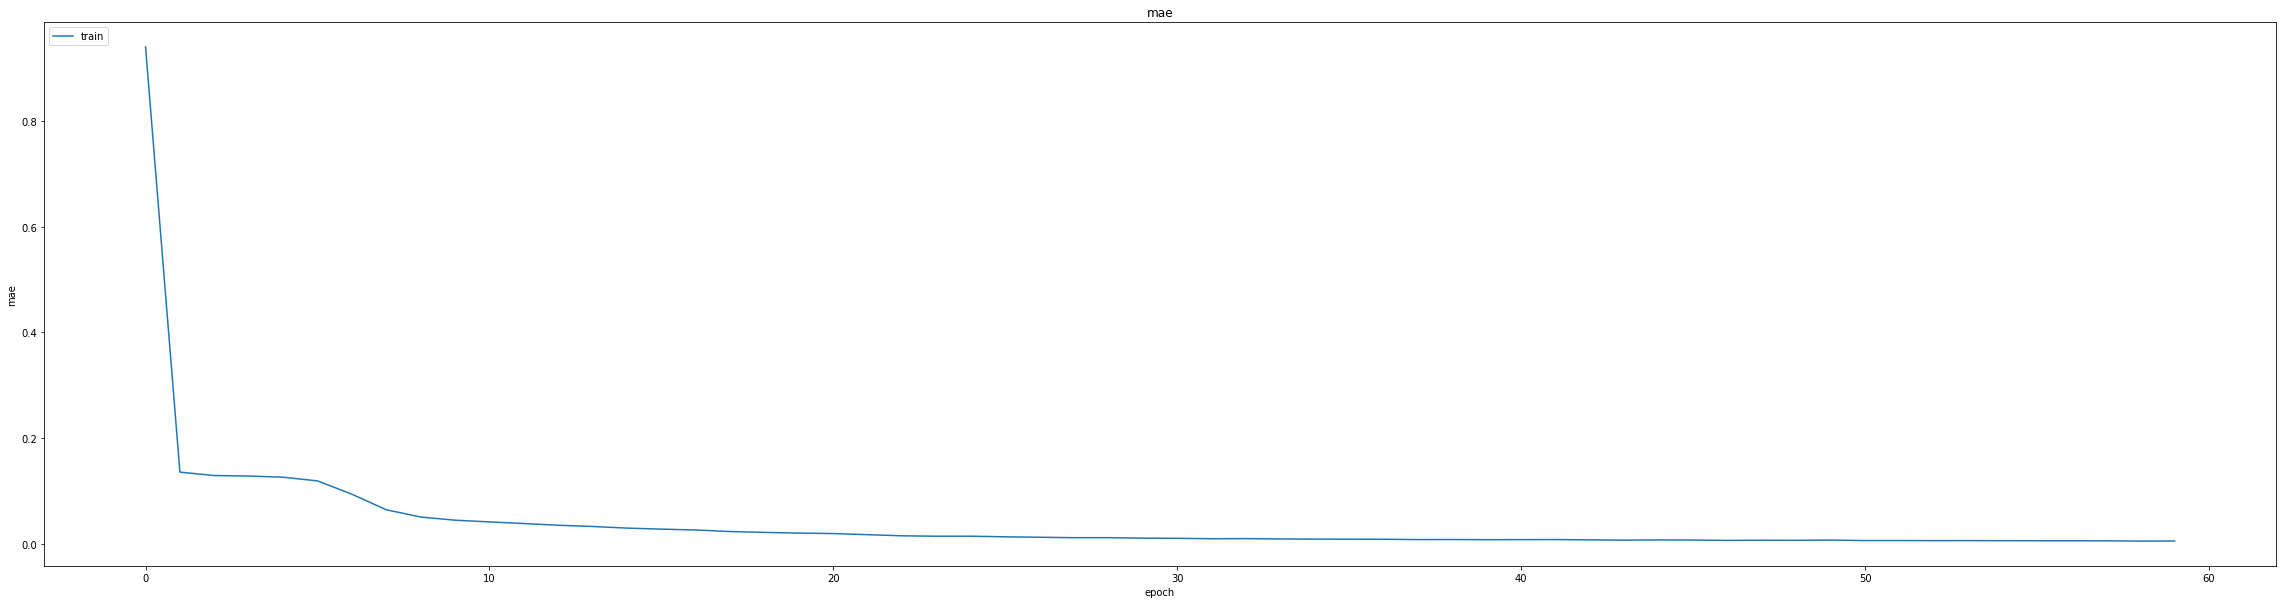

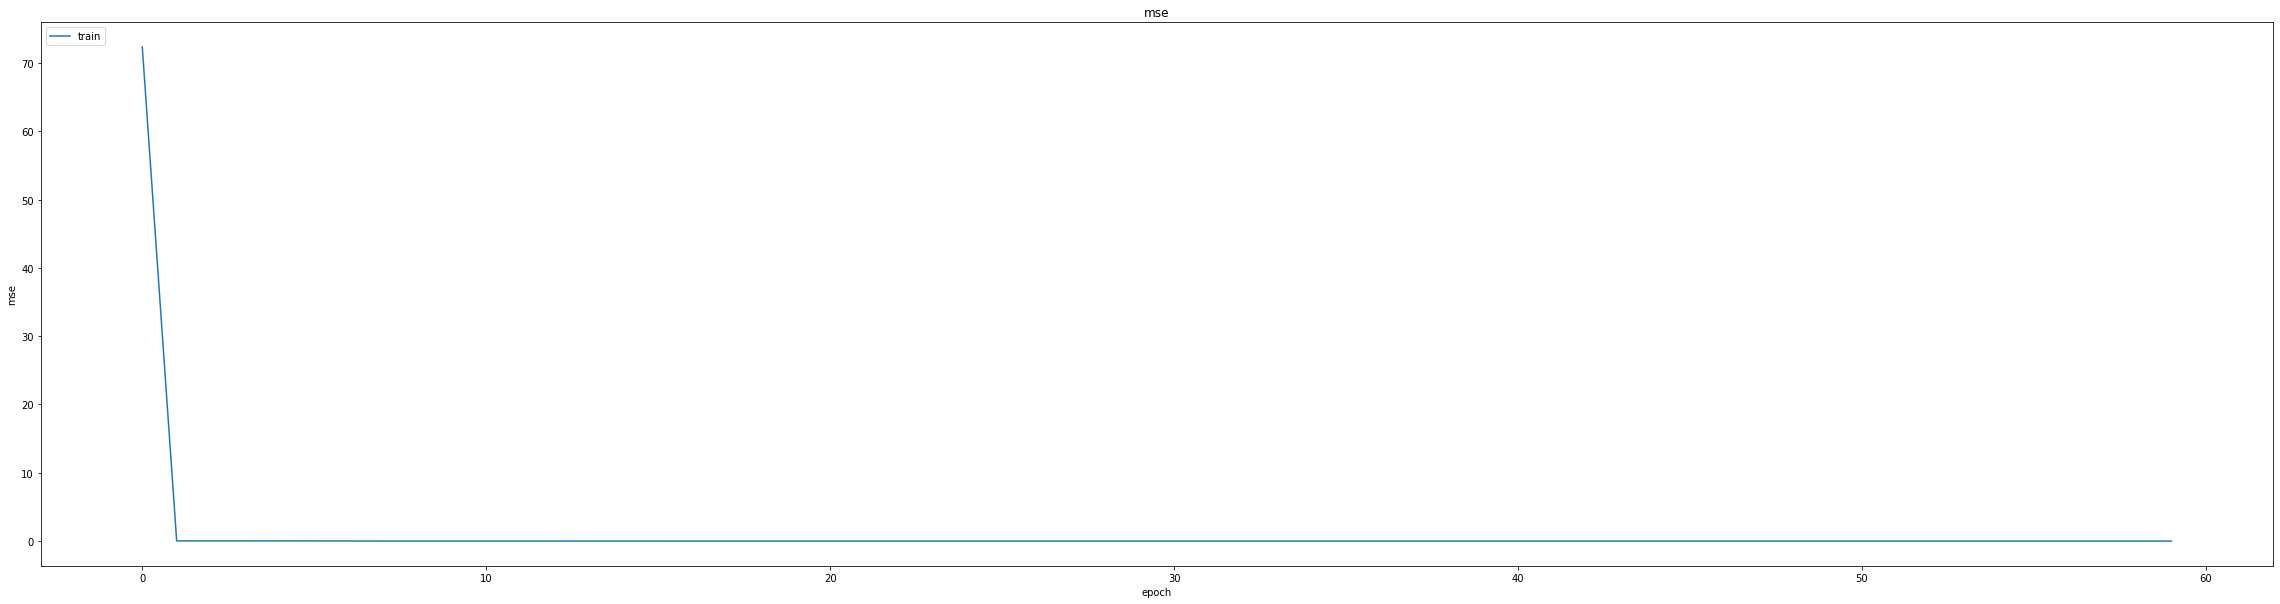

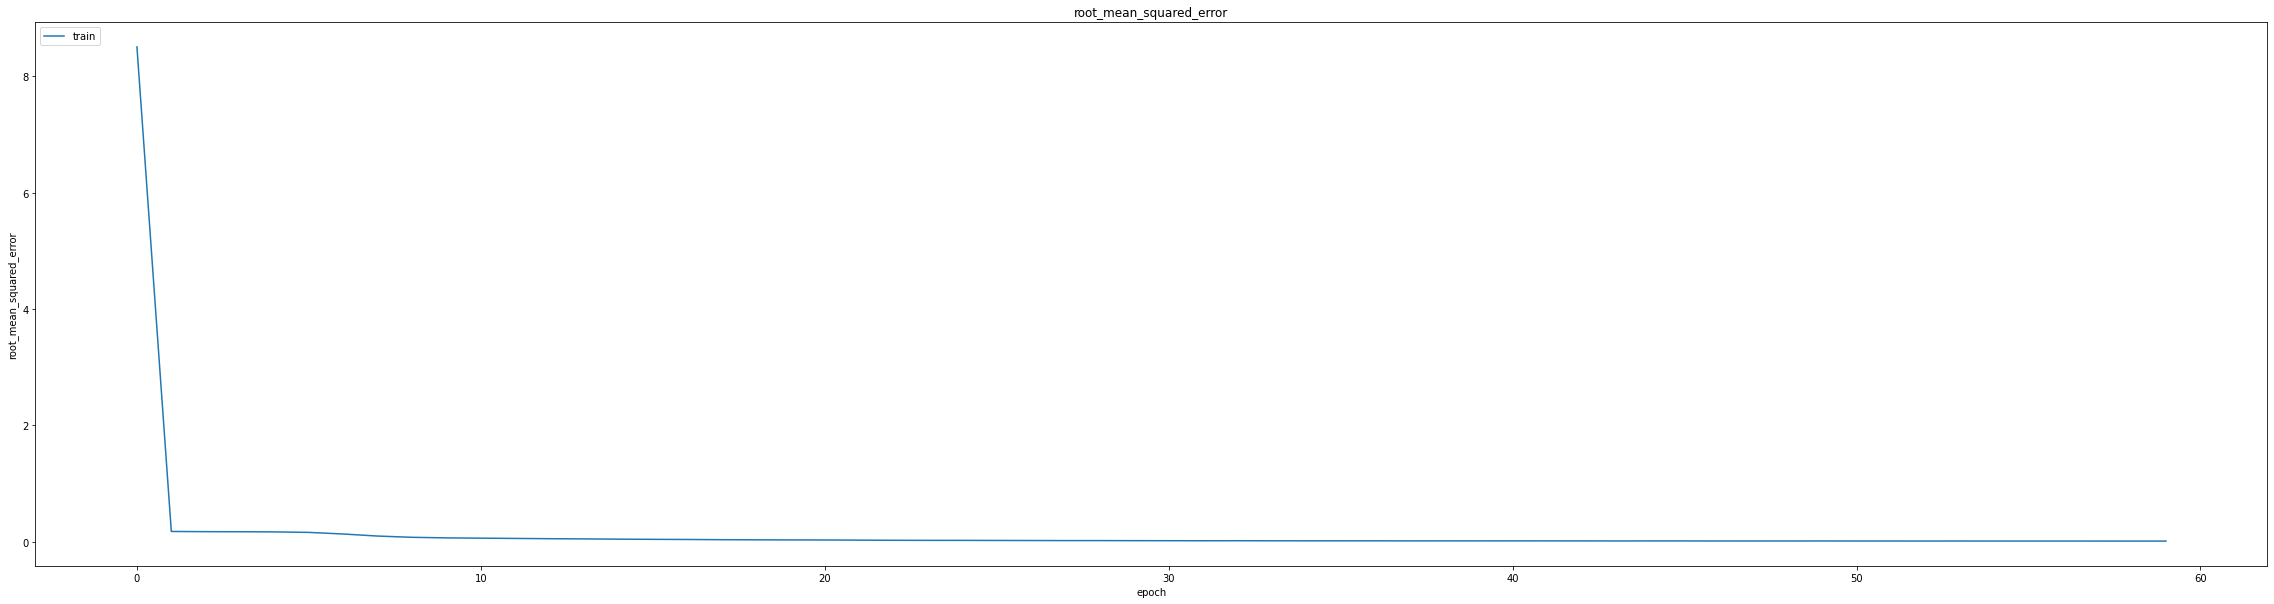

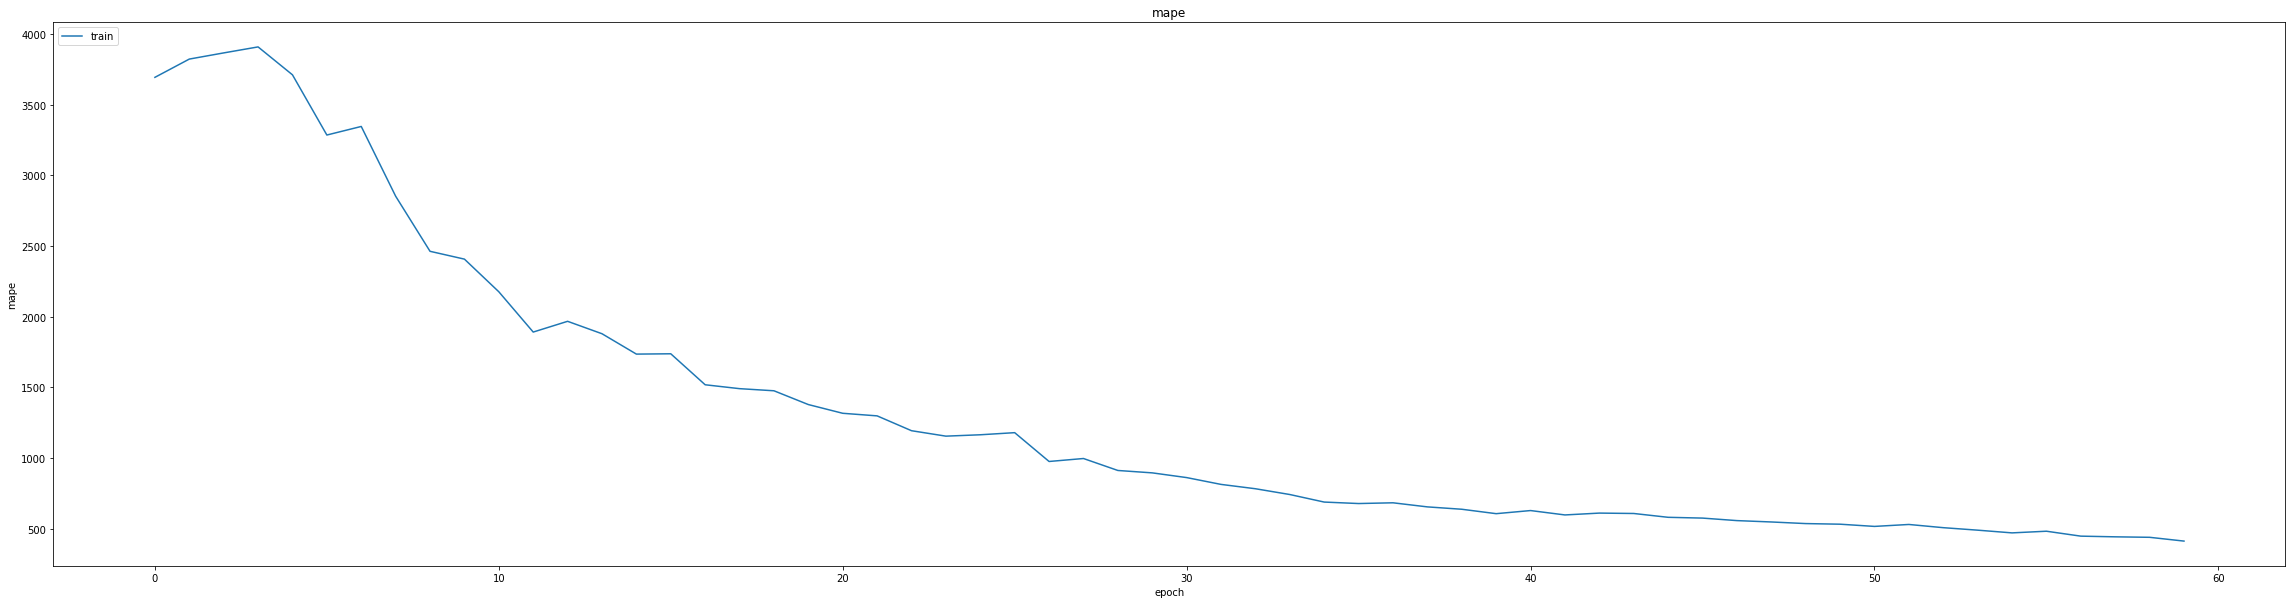

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.01461112778633833
0.019978122785687447
687/687 [==============================] - 31s 43ms/step
0.9911176686357334


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 2.9465e-04 - mae: 0.0074 - mse: 2.9465e-04 - root_mean_squared_error: 0.0172 - mape: 409.2460
Epoch 1: val_mse did not improve from 0.00040
463/463 [==============================] - 325s 690ms/step - loss: 2.9465e-04 - mae: 0.0074 - mse: 2.9465e-04 - root_mean_squared_error: 0.0172 - mape: 409.2460 - val_loss: 4.8848e-04 - val_mae: 0.0172 - val_mse: 4.8848e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 3336.3625 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 2.6532e-05 - mae: 0.0039 - mse: 2.6532e-05 - root_mean_squared_error: 0.0052 - mape: 403.8834
Epoch 2: val_mse did not improve from 0.00040
463/463 [==============================] - 320s 689ms/step - loss: 2.6532e-05 - mae: 0.0039 - mse: 2.6532e-05 - root_mean_squared_error: 0.0052 - mape: 403.8834 - val_loss: 4.2325e-04 - val_mae: 0.0157 - val_mse: 4.2325e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 3133.6028

In [ ]:
callbacks_list = [checkpoint, lr_decay]

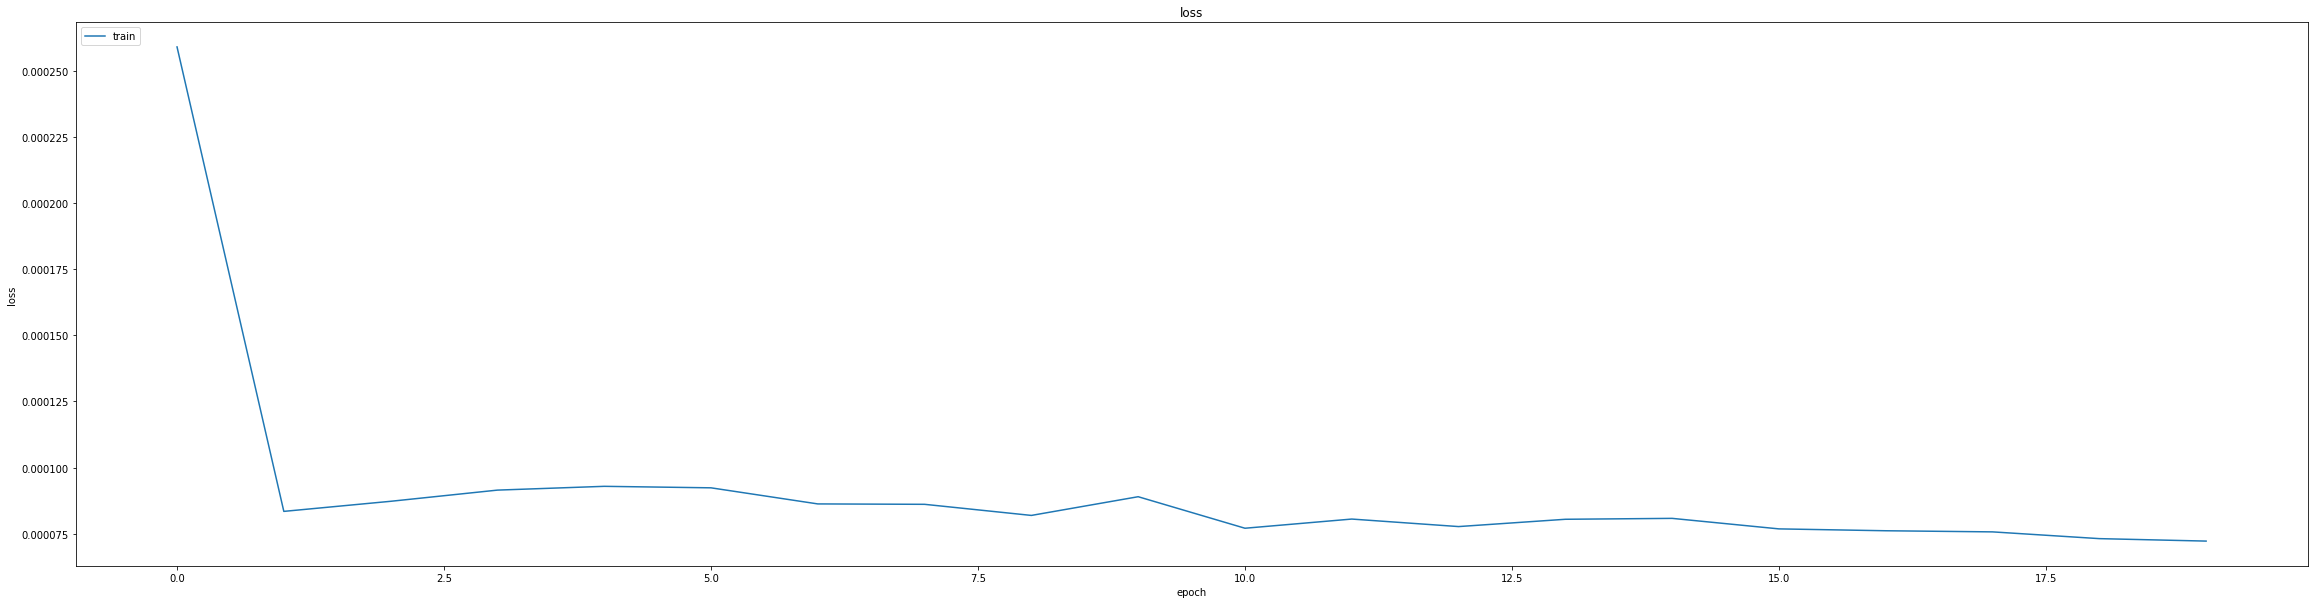

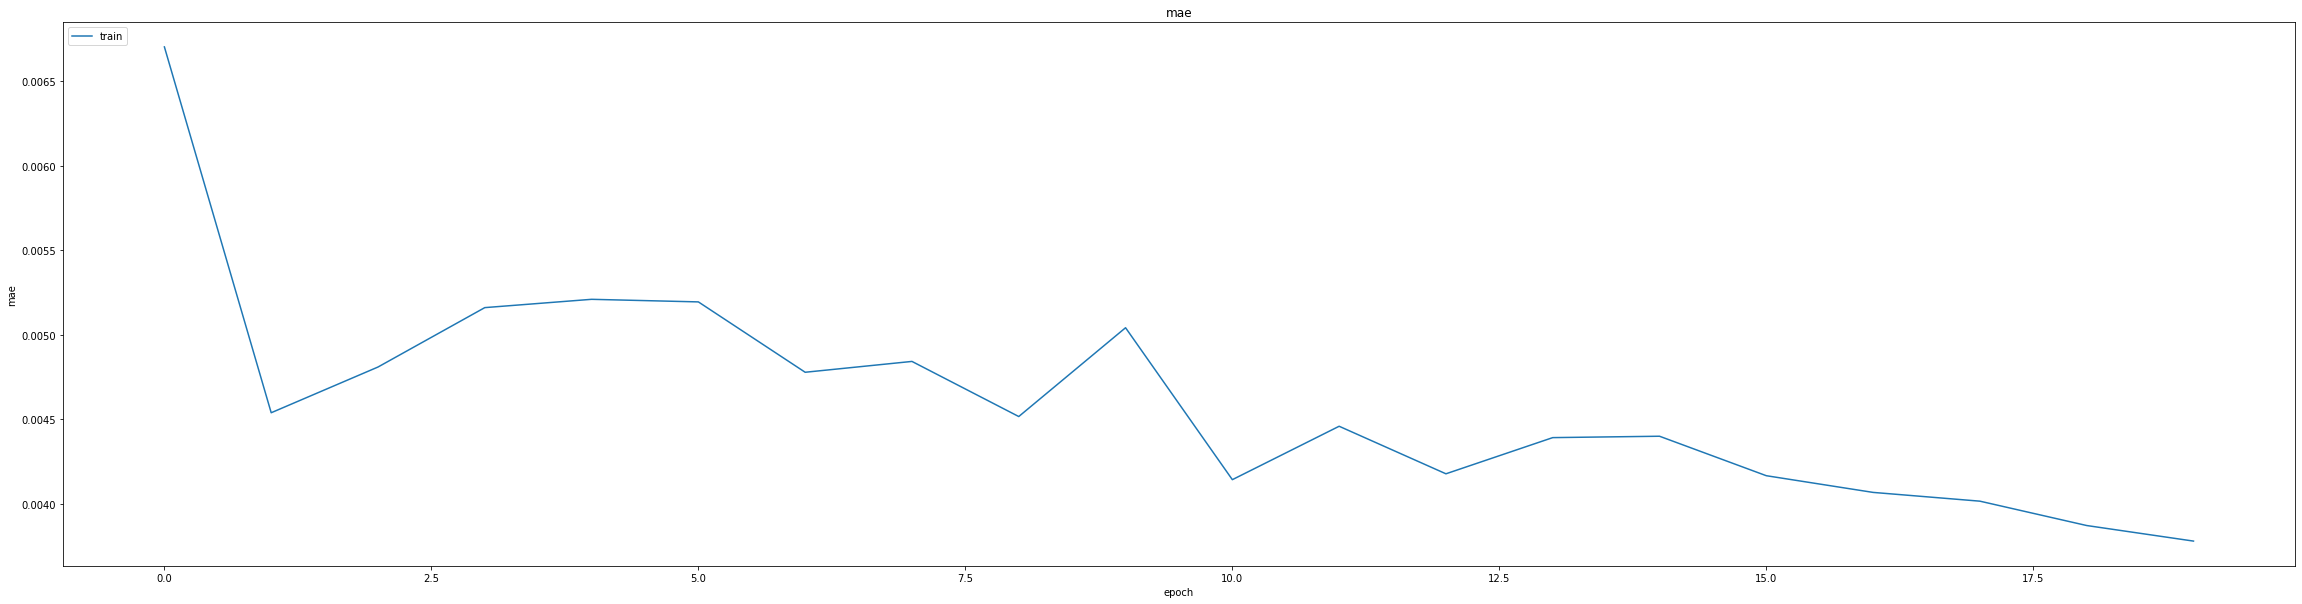

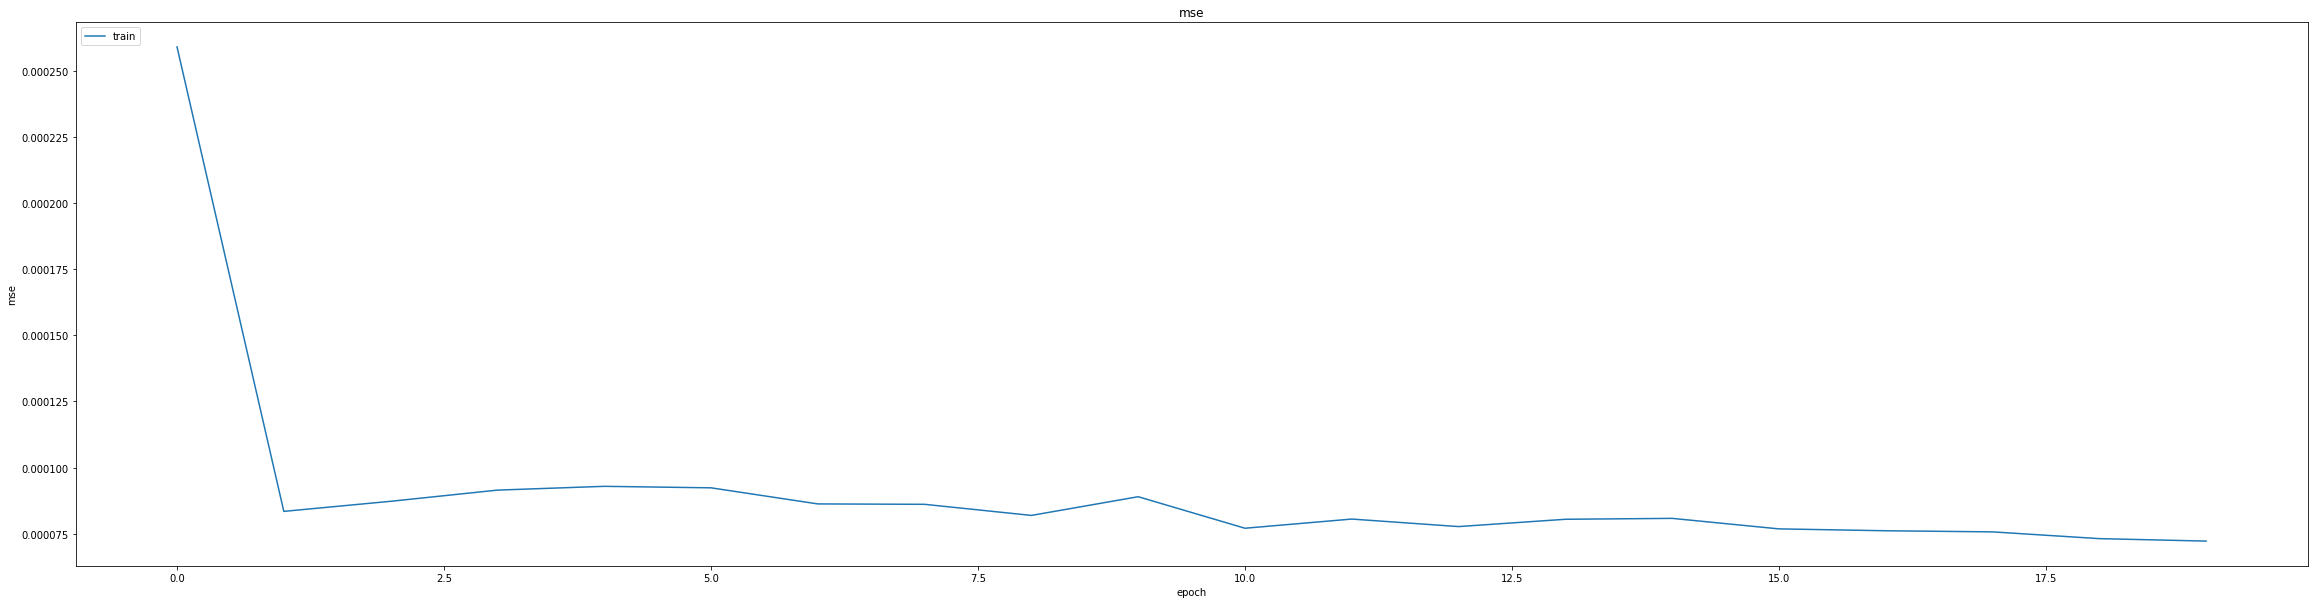

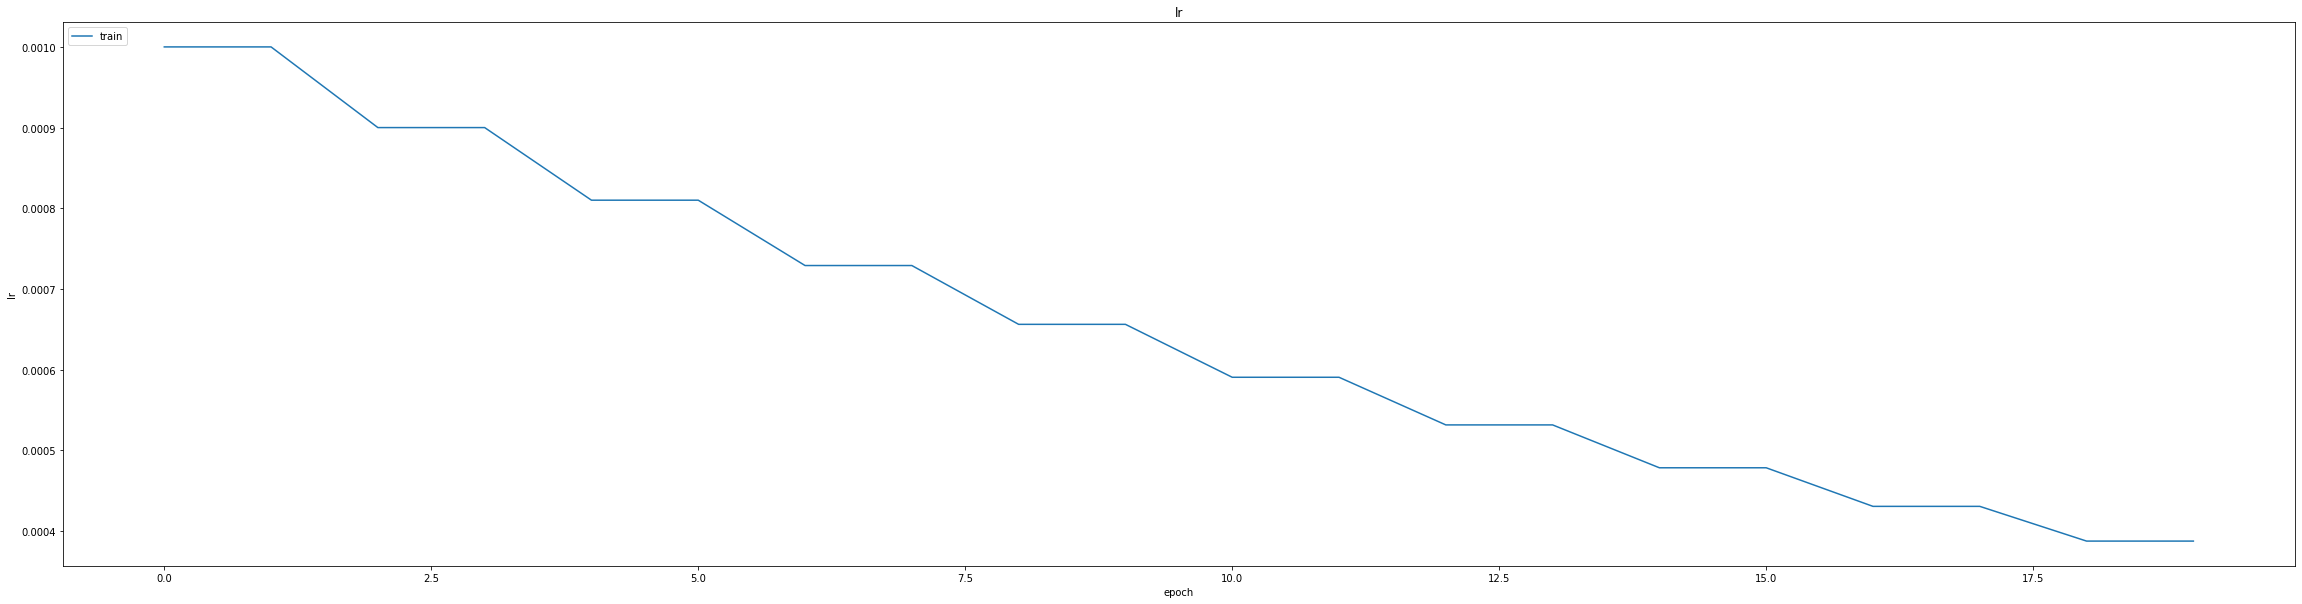

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.001994288293644786

In [ ]:
model.load_weights("weights.best.hdf5")

464/464 [==============================] - 11s 24ms/step


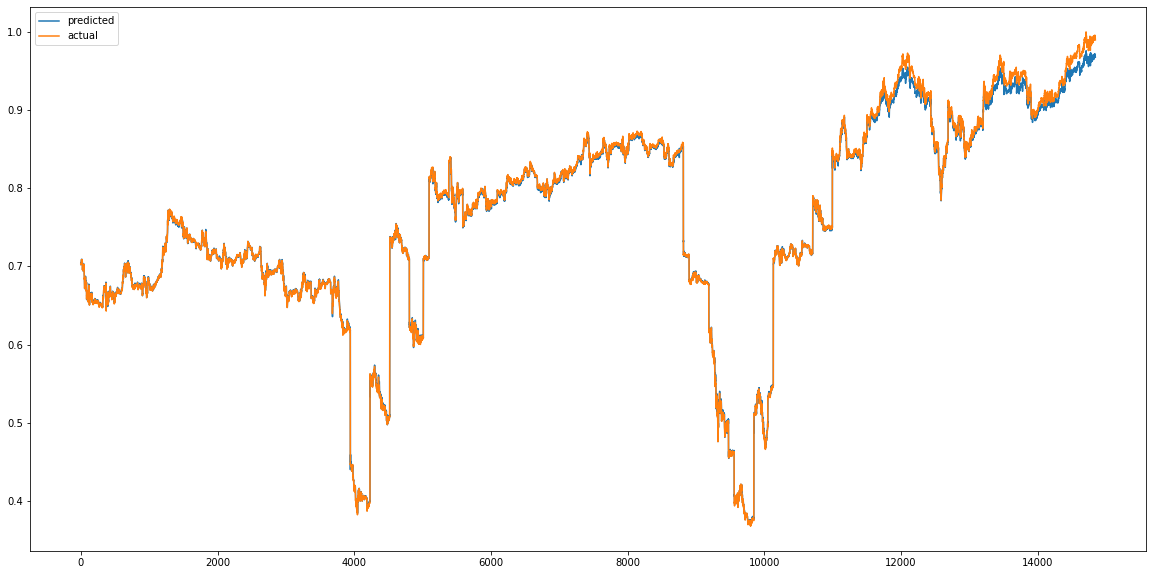

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


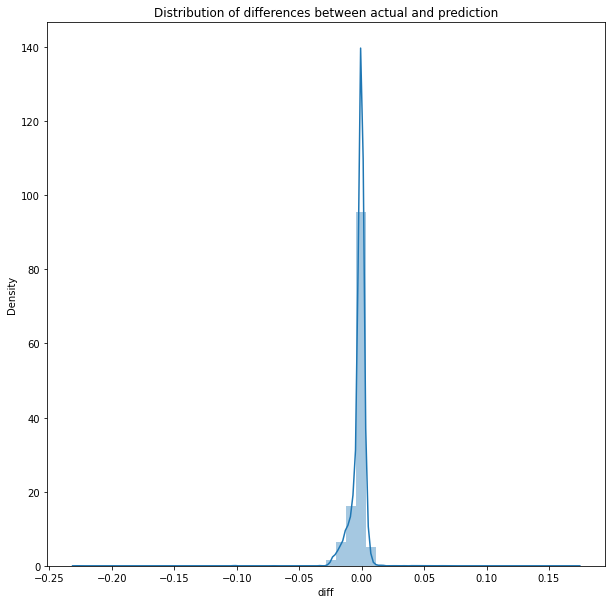

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
predictions['diff'].describe()

MSE :  4.746147856034065e-05
MAE :  0.003565254386337042


count    14843.000000
mean        -0.002222
std          0.006521
min         -0.228663
25%         -0.003217
50%         -0.000889
75%          0.000662
max          0.171868
Name: diff, dtype: float64